# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

- The customer interacts with the marketing front on social media or other online platforms.
- The customer browses the website/app and downloads the brochure
- The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:

- Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
- Find the factors driving the lead conversion process
- Create a profile of the leads which are likely to convert

## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.

**Data Dictionary**

- ID: ID of the lead
- age: Age of the lead
- current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
- first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
- profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
- website_visits: How many times has a lead visited the website
- time_spent_on_website: Total time spent on the website
- page_views_per_visit: Average number of pages on the website viewed during the visits.
- last_activity: Last interaction between the lead and ExtraaLearn.

  - Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
  - Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
  - Website Activity: Interacted on live chat with representative, Updated profile on website, etc

- print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
- print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
- digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
- educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
- referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
- status: Flag indicating whether the lead was converted to a paid customer or not.


In [1]:
# Mounting the drive
# from google.colab import drive
# drive.mount('/content/drive')

## Importing necessary libraries and data


In [2]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore")

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data


# Library to split data

# libaries to help with data visualization

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction

# To tune different models


# To get diferent metric scores

## Data Overview

- Observations
- Sanity checks


In [3]:
# path='/content/drive/MyDrive/00.electives/ExtraaLearn.csv'
path = "ExtraaLearn.csv"

In [4]:
learn = pd.read_csv(path)

In [5]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

In [6]:
# view the top 5 rows of the data
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [7]:
# view the last 5 rows of the data
data.tail(5)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [8]:
# shape of the data
data.shape

(4612, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [10]:
# check duplicate
data.duplicated().sum()
# check missing values
data.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.


**Questions**

1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?


In [11]:
data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000
mean,46.20121,3.56678,724.01127,3.02613,0.29857
std,13.16145,2.82913,743.82868,1.96812,0.45768
min,18.00000,0.00000,0.00000,0.00000,0.00000
25%,36.00000,2.00000,148.75000,2.07775,0.00000
50%,51.00000,3.00000,376.00000,2.79200,0.00000
75%,57.00000,5.00000,1336.75000,3.75625,1.00000
max,63.00000,30.00000,2537.00000,18.43400,1.00000


In [12]:
# describe the data for all columns
data.describe(include="all")

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
count,4612,4612.00000,4612,4612,4612,4612.00000,4612.00000,4612.00000,4612,4612,4612,4612,4612,4612,4612.00000
unique,4612,NaN,3,2,3,NaN,NaN,NaN,3,2,2,2,2,2,NaN
top,EXT001,NaN,Professional,Website,High,NaN,NaN,NaN,Email Activity,No,No,No,No,No,NaN
freq,1,NaN,2616,2542,2264,NaN,NaN,NaN,2278,4115,4379,4085,3907,4519,NaN
mean,NaN,46.20121,NaN,NaN,NaN,3.56678,724.01127,3.02613,NaN,NaN,NaN,NaN,NaN,NaN,0.29857
std,NaN,13.16145,NaN,NaN,NaN,2.82913,743.82868,1.96812,NaN,NaN,NaN,NaN,NaN,NaN,0.45768
min,NaN,18.00000,NaN,NaN,NaN,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
25%,NaN,36.00000,NaN,NaN,NaN,2.00000,148.75000,2.07775,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
50%,NaN,51.00000,NaN,NaN,NaN,3.00000,376.00000,2.79200,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
75%,NaN,57.00000,NaN,NaN,NaN,5.00000,1336.75000,3.75625,NaN,NaN,NaN,NaN,NaN,NaN,1.00000


In [13]:
# make a list of all categorical values
categorical_columns = data.select_dtypes(include="object").columns
print(categorical_columns)

# Printing number of count of each unique value in each column
for column in categorical_columns:
    print(data[column].value_counts())
    print("-" * 50)

# print the number of unique values in each categorical column
for column in categorical_columns:
    print(f"{column}: {data[column].nunique()}")

Index(['ID', 'current_occupation', 'first_interaction', 'profile_completed',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral'],
      dtype='object')
ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
--------------------------------------------------
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dty

In [14]:
# checking the number of unique values
data["ID"].nunique()  # Complete the code to check the number of unique values

4612

In [15]:
data.drop(["ID"], axis=1, inplace=True)  # Complete the code to drop "ID" column from data

## Univariate Analysis


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def histogram_boxplot(data, feature=None, figsize=(12, 7), kde=False, bins="auto", color="skyblue"):
    """
    Enhanced boxplot and histogram combined with titles and statistical annotations.
    If a specific feature is given, plots for that feature. If no feature is specified,
    plots for all numerical features in the DataFrame.

    Parameters:
    - data: DataFrame containing the dataset.
    - feature: Optional; Column name of the feature to be plotted. If None, applies to all numerical features.
    - figsize: Tuple indicating figure size. Default is (12,7).
    - kde: Boolean indicating whether to show a kernel density estimate (KDE). Default is False.
    - bins: Number of bins for the histogram, a binning strategy string, or None. If None, 'auto' strategy is used. Default is 'auto'.
    - color: Color for the histogram and boxplot. Default is "skyblue".
    """
    if feature:
        features_to_plot = [feature]
    else:
        features_to_plot = data.select_dtypes(include=[np.number]).columns.tolist()

    for feature in features_to_plot:
        f, (ax_box, ax_hist) = plt.subplots(
            nrows=2,  # Number of rows of the subplot grid= 2
            sharex=True,  # x-axis will be shared among all subplots
            gridspec_kw={"height_ratios": (0.25, 0.75)},
            figsize=figsize,
        )
        sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color=color)
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins, color=color)

        mean = data[feature].mean()
        median = data[feature].median()

        ax_hist.axvline(mean, color="r", linestyle="--")
        ax_hist.axvline(median, color="g", linestyle="-")

        ax_hist.legend({"Mean": mean, "Median": median})

        ax_box.set(xlabel="")  # Remove x-axis label for boxplot
        ax_hist.set_title(f"Distribution and Boxplot of {feature}")
        ax_hist.text(mean, 0, f"Mean: {mean:.2f}", color="r", ha="right")
        ax_hist.text(median, 0, f"Median: {median:.2f}", color="g", ha="left")

        plt.tight_layout()
        plt.show()

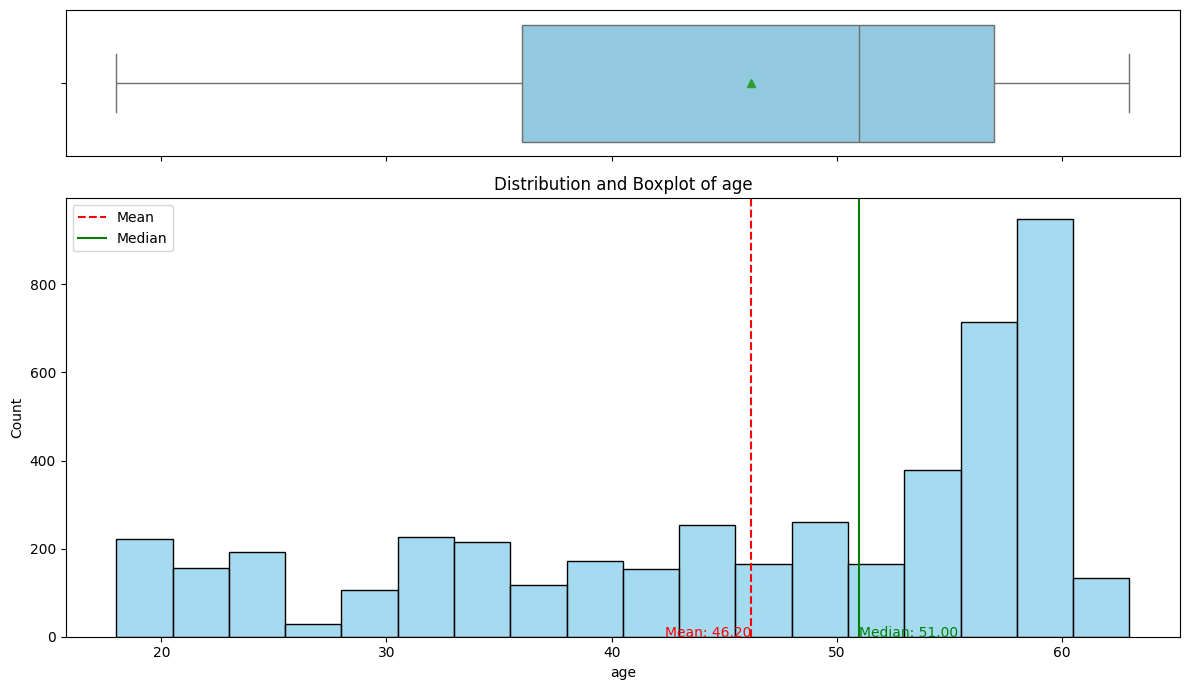

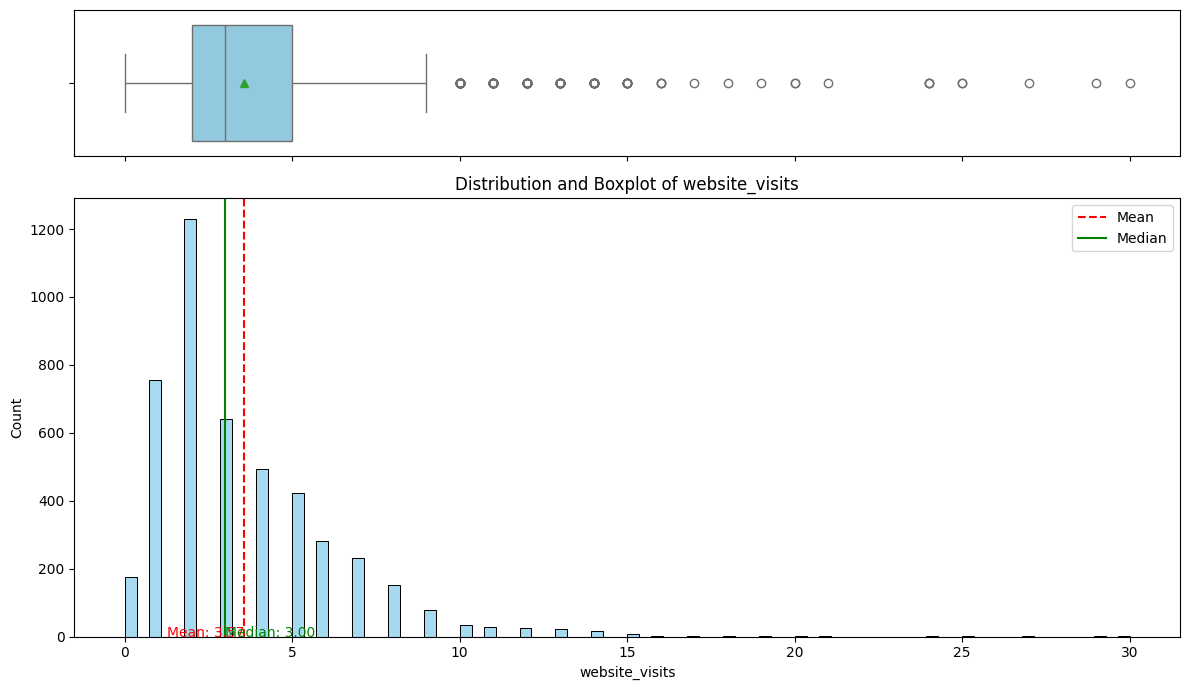

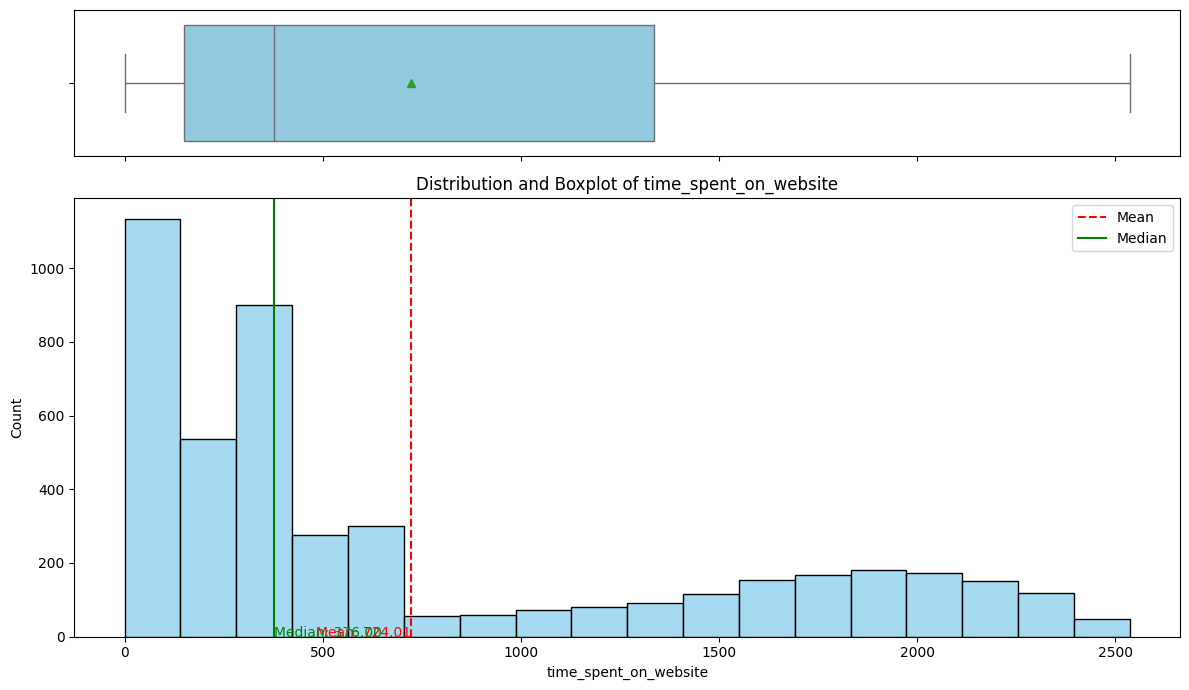

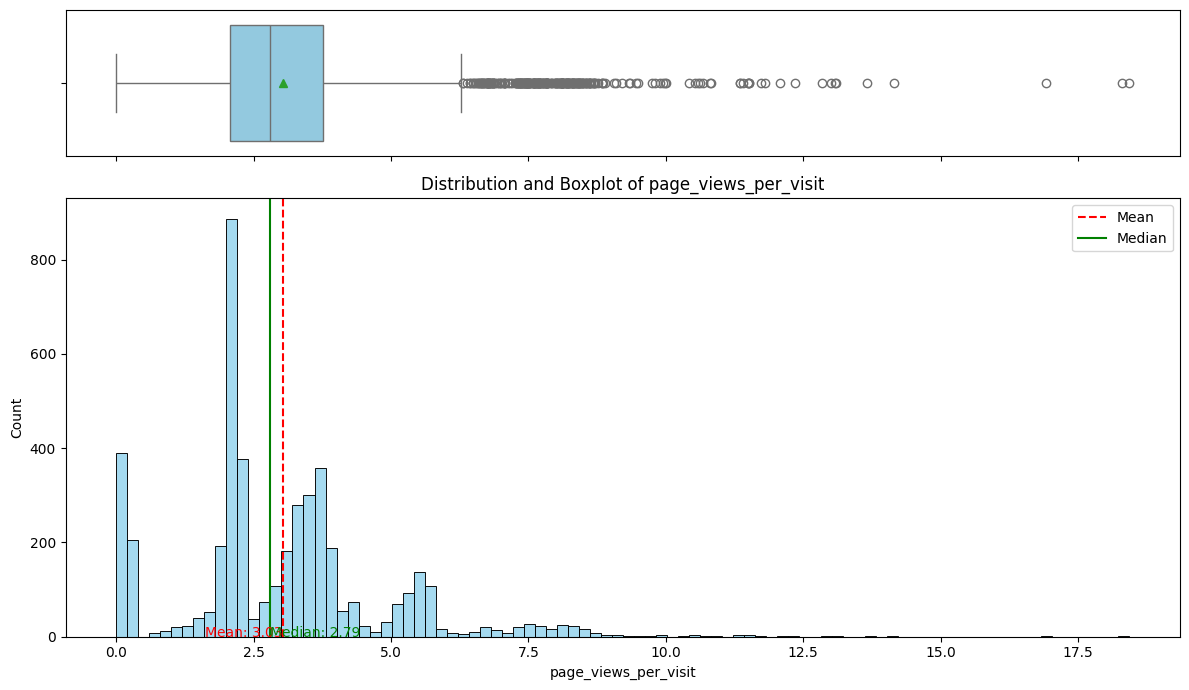

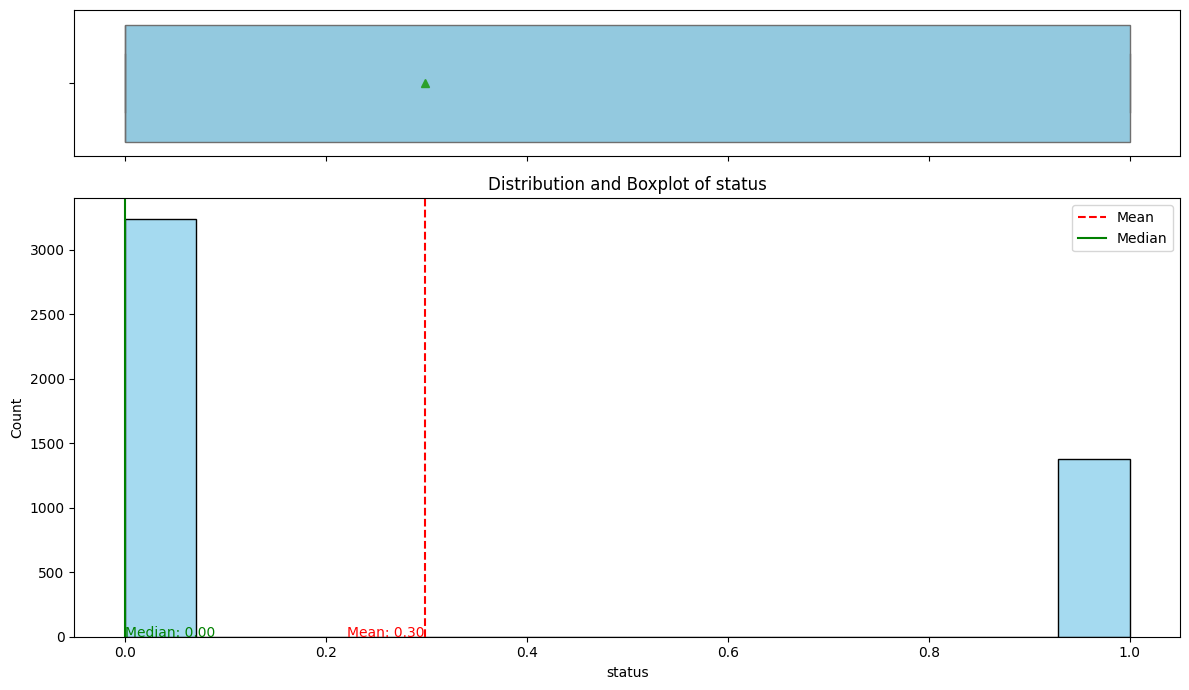

In [17]:
histogram_boxplot(data)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


def labeled_barplots_for_all_categorical(data, perc=False, n=None):
    """
    Creates labeled bar plots for all categorical features in the dataframe.

    Parameters:
    - data: DataFrame containing the dataset.
    - perc: Boolean indicating whether to display percentages instead of count. Default is False.
    - n: Displays the top n category levels. Default is None, i.e., display all levels.
    """

    categorical_features = data.select_dtypes(include=["object", "category"]).columns.tolist()

    for feature in categorical_features:
        total = len(data[feature])  # length of the column
        count = data[feature].nunique()
        figsize_width = min(20, max(count, 5))  # Cap the figsize width to a max of 20
        figsize_height = 5

        if n is None or n >= count:
            plt.figure(figsize=(figsize_width, figsize_height))
        else:
            plt.figure(figsize=(figsize_width, figsize_height))

        plt.xticks(rotation=45, ha="right", fontsize=12)
        ax = sns.countplot(
            data=data,
            x=feature,
            palette="Paired",
            order=data[feature].value_counts().iloc[:n].index if n is not None else data[feature].value_counts().index,
        )

        for p in ax.patches:
            height = p.get_height()
            if perc:
                label = "{:.1f}%".format(100 * height / total)  # percentage of each class of the category
            else:
                label = height  # count of each level of the category

            x = p.get_x() + p.get_width() / 2  # width of the plot
            y = height  # height of the plot

            ax.annotate(
                label,
                (x, y),
                ha="center",
                va="bottom",
                size=10,
                xytext=(0, 5),
                textcoords="offset points",
            )  # annotate the percentage or count

        plt.title(f"Distribution of {feature}", fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel("Counts" if not perc else "Percentage", fontsize=12)
        plt.tight_layout()
        plt.show()

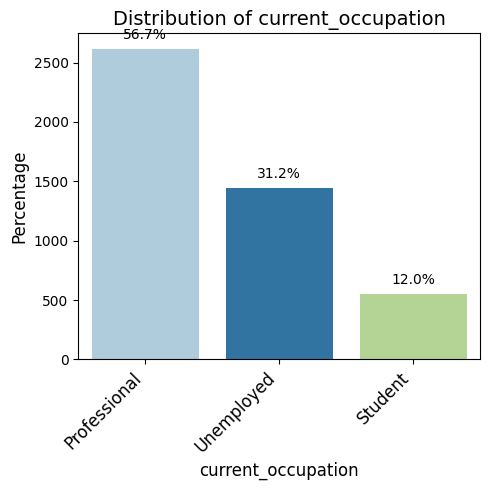

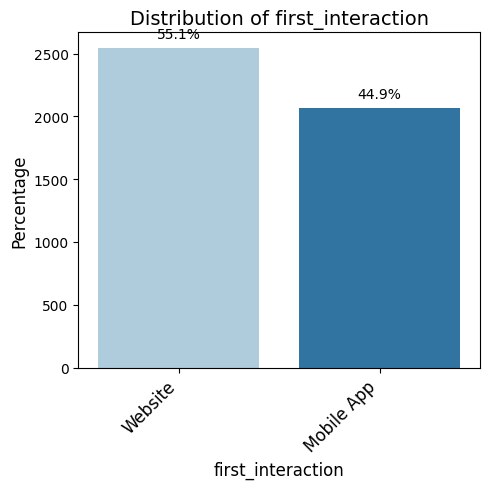

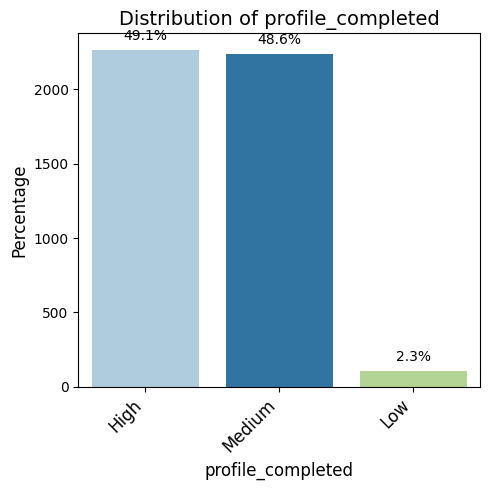

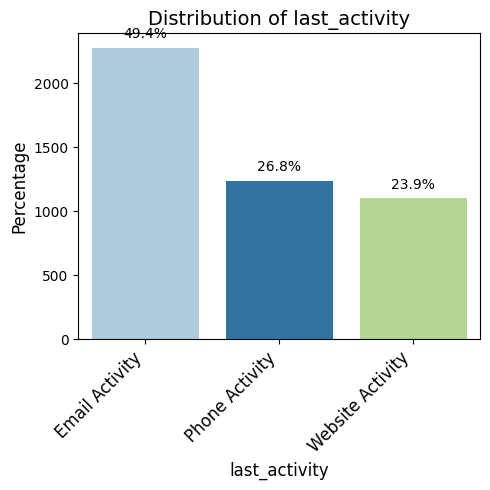

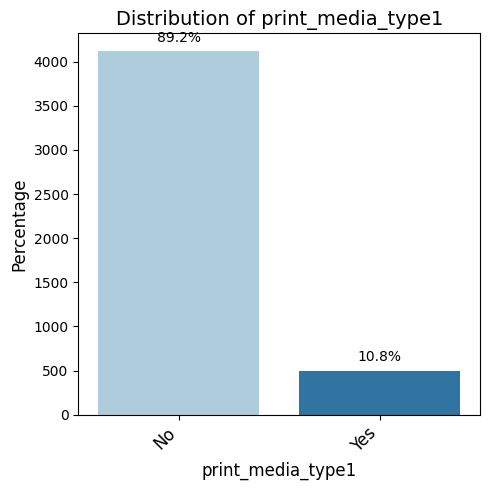

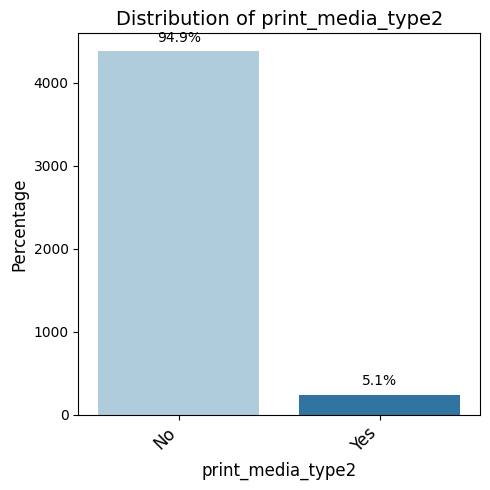

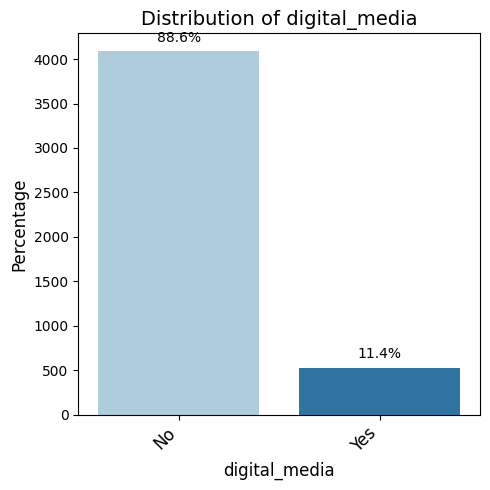

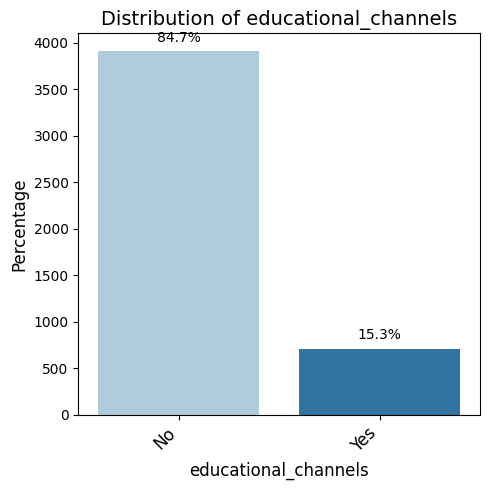

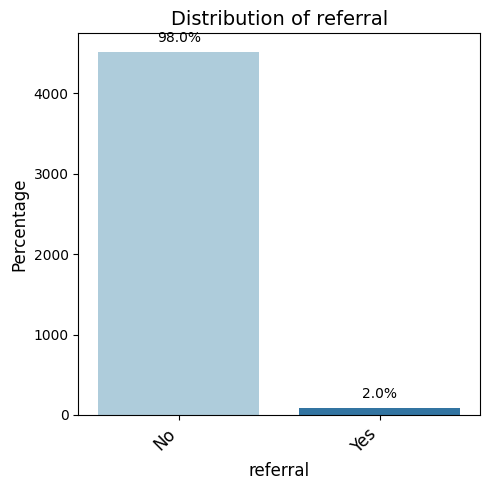

In [19]:
labeled_barplots_for_all_categorical(data, perc=True)

## Bivariate Analysis


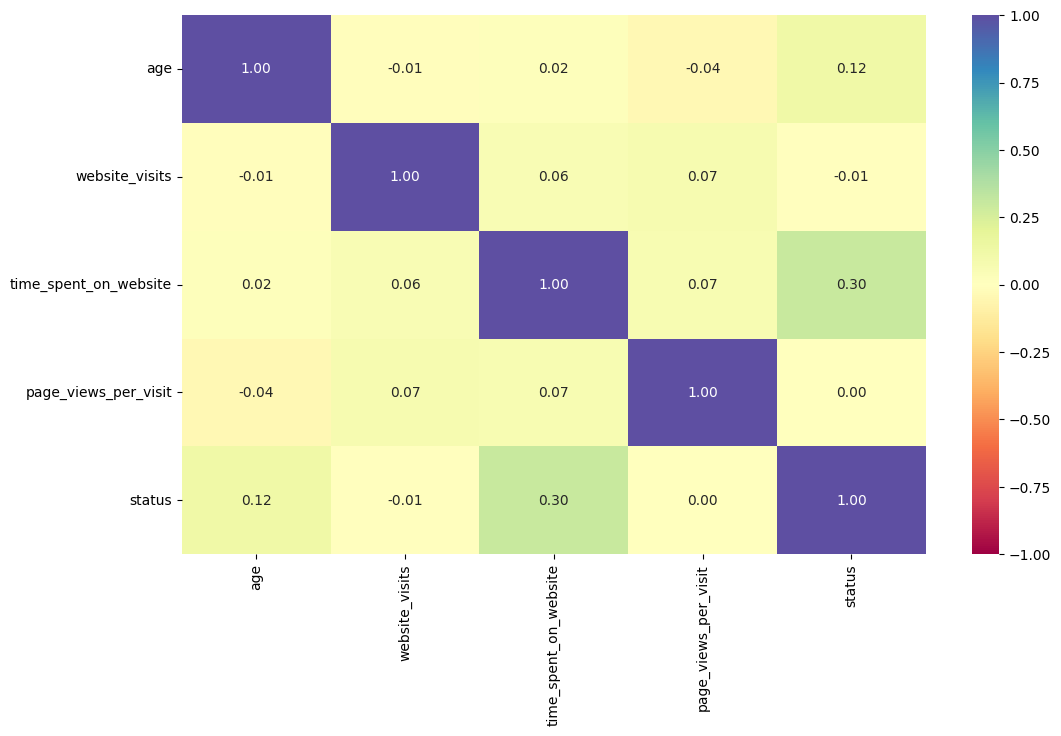

In [20]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [21]:
from typing import Any, Tuple
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def distribution_plot_wrt_target(data: pd.DataFrame, predictor: str, target: str) -> None:
    """
    Plots the distribution of a predictor variable with respect to a target variable.
    This function dynamically creates plots based on the unique values of the target,
    including histograms with KDE for each class of the target and comparative boxplots.

    Parameters:
    - data (pd.DataFrame): The dataset containing both predictor and target variables.
    - predictor (str): The name of the predictor variable column to plot.
    - target (str): The name of the target variable column based on which distributions are plotted.

    Returns:
    - None: This function directly renders plots and does not return any value.
    """
    # Determine the unique number of target classes
    target_uniq = data[target].unique()
    n_classes = len(target_uniq)

    # Determine the subplot grid size dynamically
    cols = 2
    rows = n_classes + 1 if n_classes > 1 else 2  # Extra row for boxplots

    fig, axs = plt.subplots(rows, cols, figsize=(12, 5 * rows))
    if rows > 2:
        axs = axs.flatten()  # Flatten to 1D for easy indexing in case of multiple rows
    else:
        axs = axs.ravel()

    # Plot histograms with KDE for each target class
    for i, val in enumerate(target_uniq):
        sns.histplot(
            data=data[data[target] == val],
            x=predictor,
            kde=True,
            ax=axs[i],
            color="skyblue" if i % 2 == 0 else "lightgreen",
            stat="density",
        ).set_title(f"Distribution of {predictor} for {target}={val}")

    # Plot comparative boxplots
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[-2], palette="gist_rainbow").set_title(
        f"Boxplot of {predictor} w.r.t {target}"
    )
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[-1], showfliers=False, palette="gist_rainbow").set_title(
        f"Boxplot of {predictor} (without outliers) w.r.t {target}"
    )

    plt.tight_layout()
    plt.show()

In [22]:
from typing import Any
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def stacked_barplot(data: pd.DataFrame, predictor: str, target: str) -> None:
    """
        Generates a stacked bar plot to visualize the distribution of a categorical predictor variable
        across different classes of a target variable. Additionally, prints a crosstab of counts and
        normalized proportions of the predictor categories within each target class.

        Parameters:
        - data (pd.DataFrame): The dataset containing both the predictor and target variables.
        - predictor (str): The name of the predictor variable column. This variable should be categorical.
    - target (str): The name of the target variable column. This variable should also be categorical.

        Returns:
        - None: This function renders a stacked bar plot and prints crosstabulations but does not return any value.

        Note:
        - This function automatically adjusts the size of the plot based on the number of unique categories
          in the predictor variable to improve readability.
        - The function prints two tables: one showing the raw counts of categories within each class of the target
          variable and another showing the normalized proportions for easier comparison across categories.
    """
    # Count unique categories in the predictor variable
    count = data[predictor].nunique()

    # Determine the least common category in the target variable for sorting
    sorter = data[target].value_counts().index[-1]

    # Generate and print a crosstab of counts
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)

    # Generate and plot a normalized crosstab for the stacked bar plot
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=sorter, ascending=False)
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [23]:
def perform_bivariate_analysis(data: pd.DataFrame, target: str) -> None:
    """
    Performs bivariate analysis of all variables in the dataframe against a specified target variable.
    It uses distribution plots for numerical predictors and stacked bar plots for categorical predictors.

    Parameters:
    - data (pd.DataFrame): The dataframe containing the dataset.
    - target (str): The target variable for the bivariate analysis.

    Returns:
    - None: The function renders plots for the analysis but does not return any value.
    """
    # Separate variables by type
    numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns
    categorical_cols = data.select_dtypes(include=["object", "category"]).columns

    # Remove the target variable from analysis if it's included in predictors
    numerical_cols = numerical_cols.drop(target, errors="ignore")
    categorical_cols = categorical_cols.drop(target, errors="ignore")

    # Numerical variables analysis
    for col in numerical_cols:
        distribution_plot_wrt_target(data, predictor=col, target=target)

    # Categorical variables analysis
    for col in categorical_cols:
        print(f"\nBivariate analysis for {col} against {target}:")
        stacked_barplot(data, predictor=col, target=target)

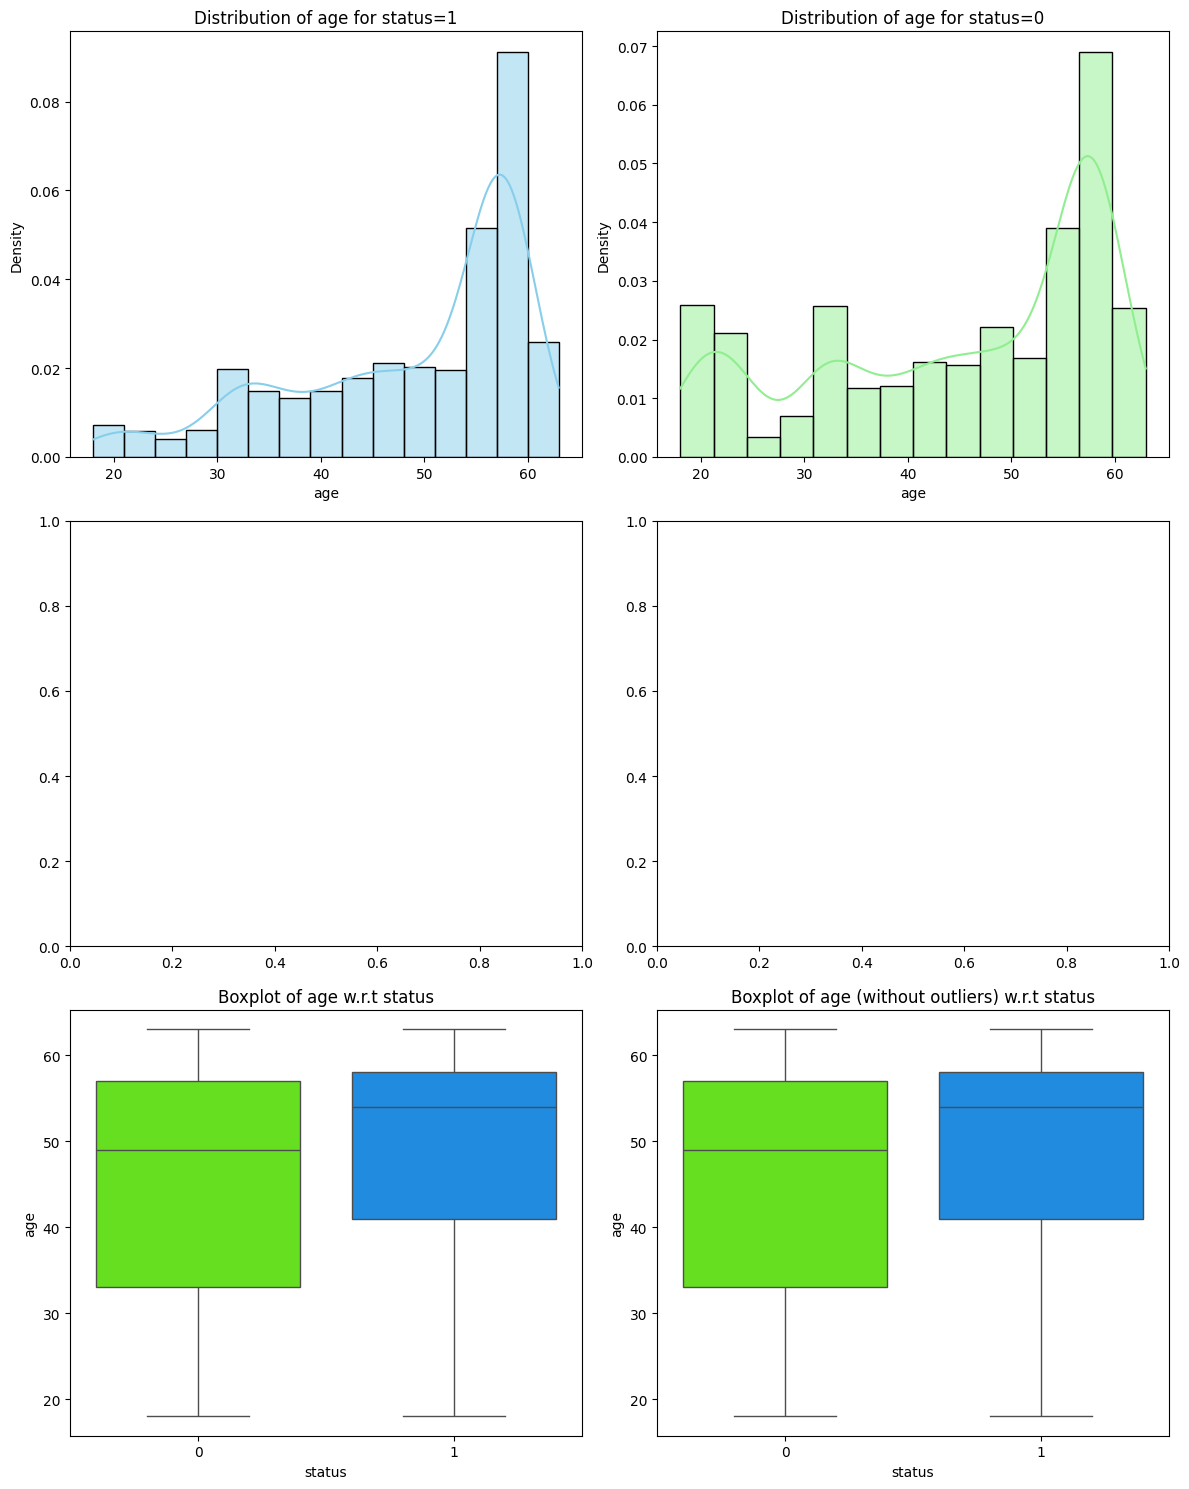

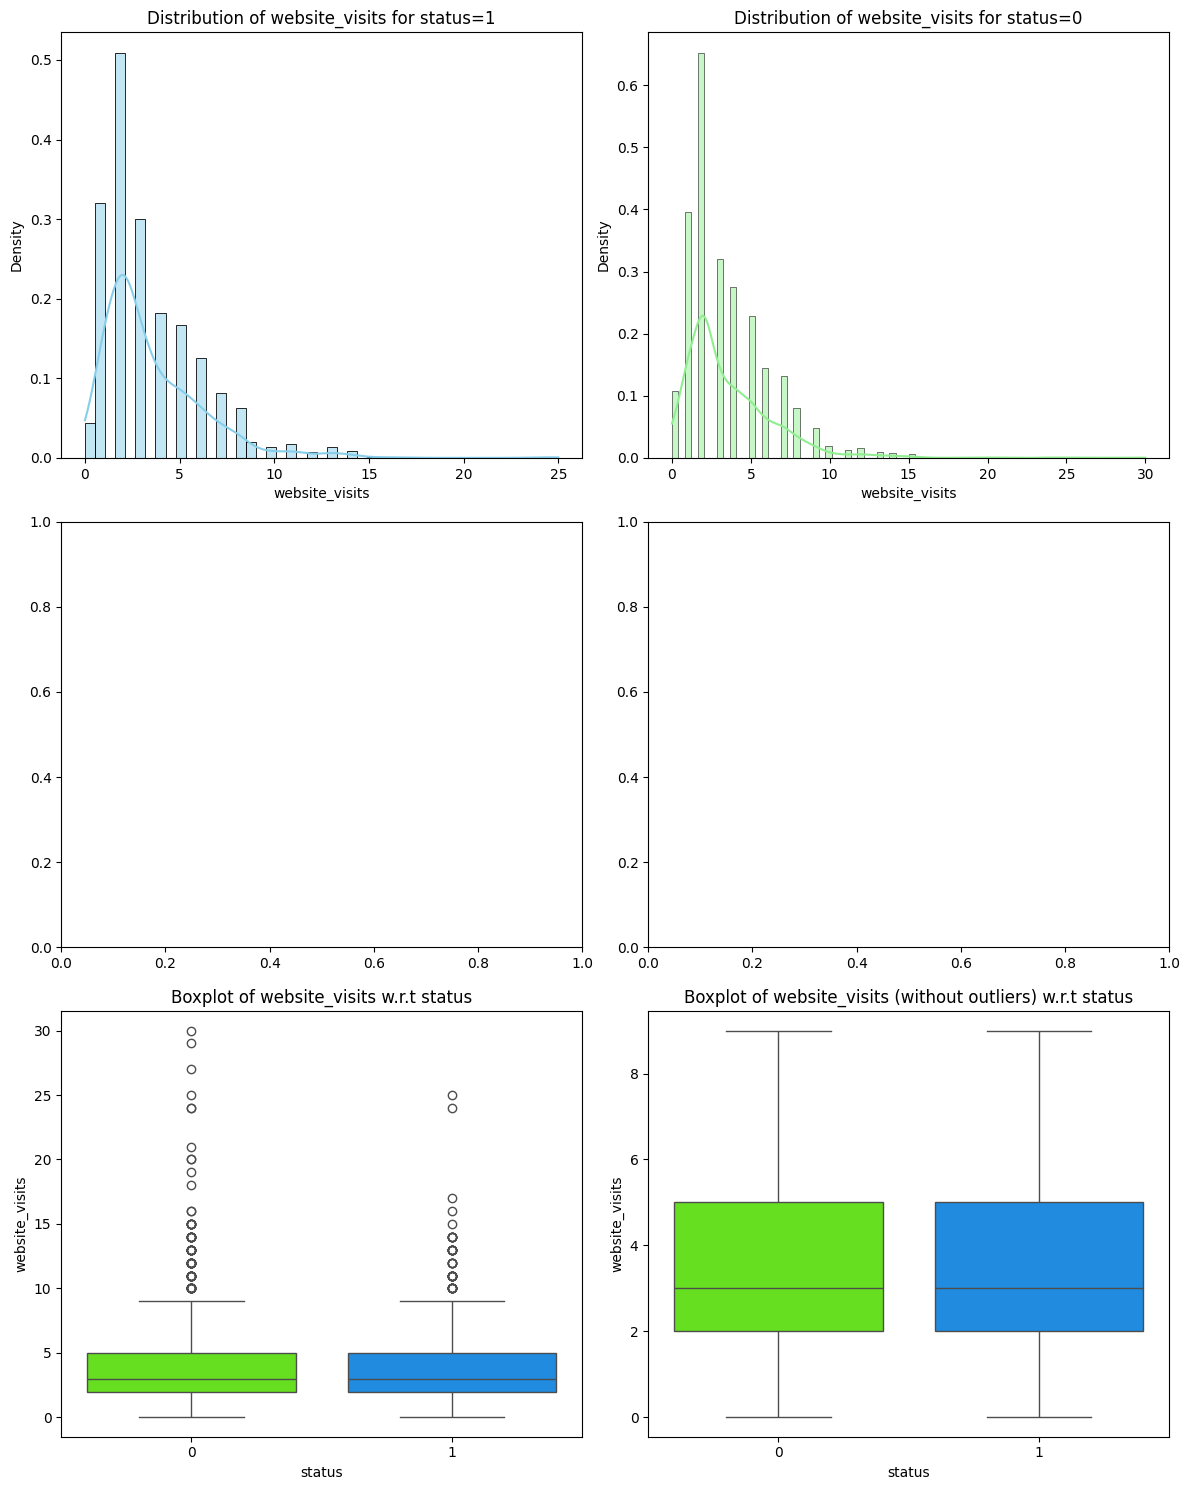

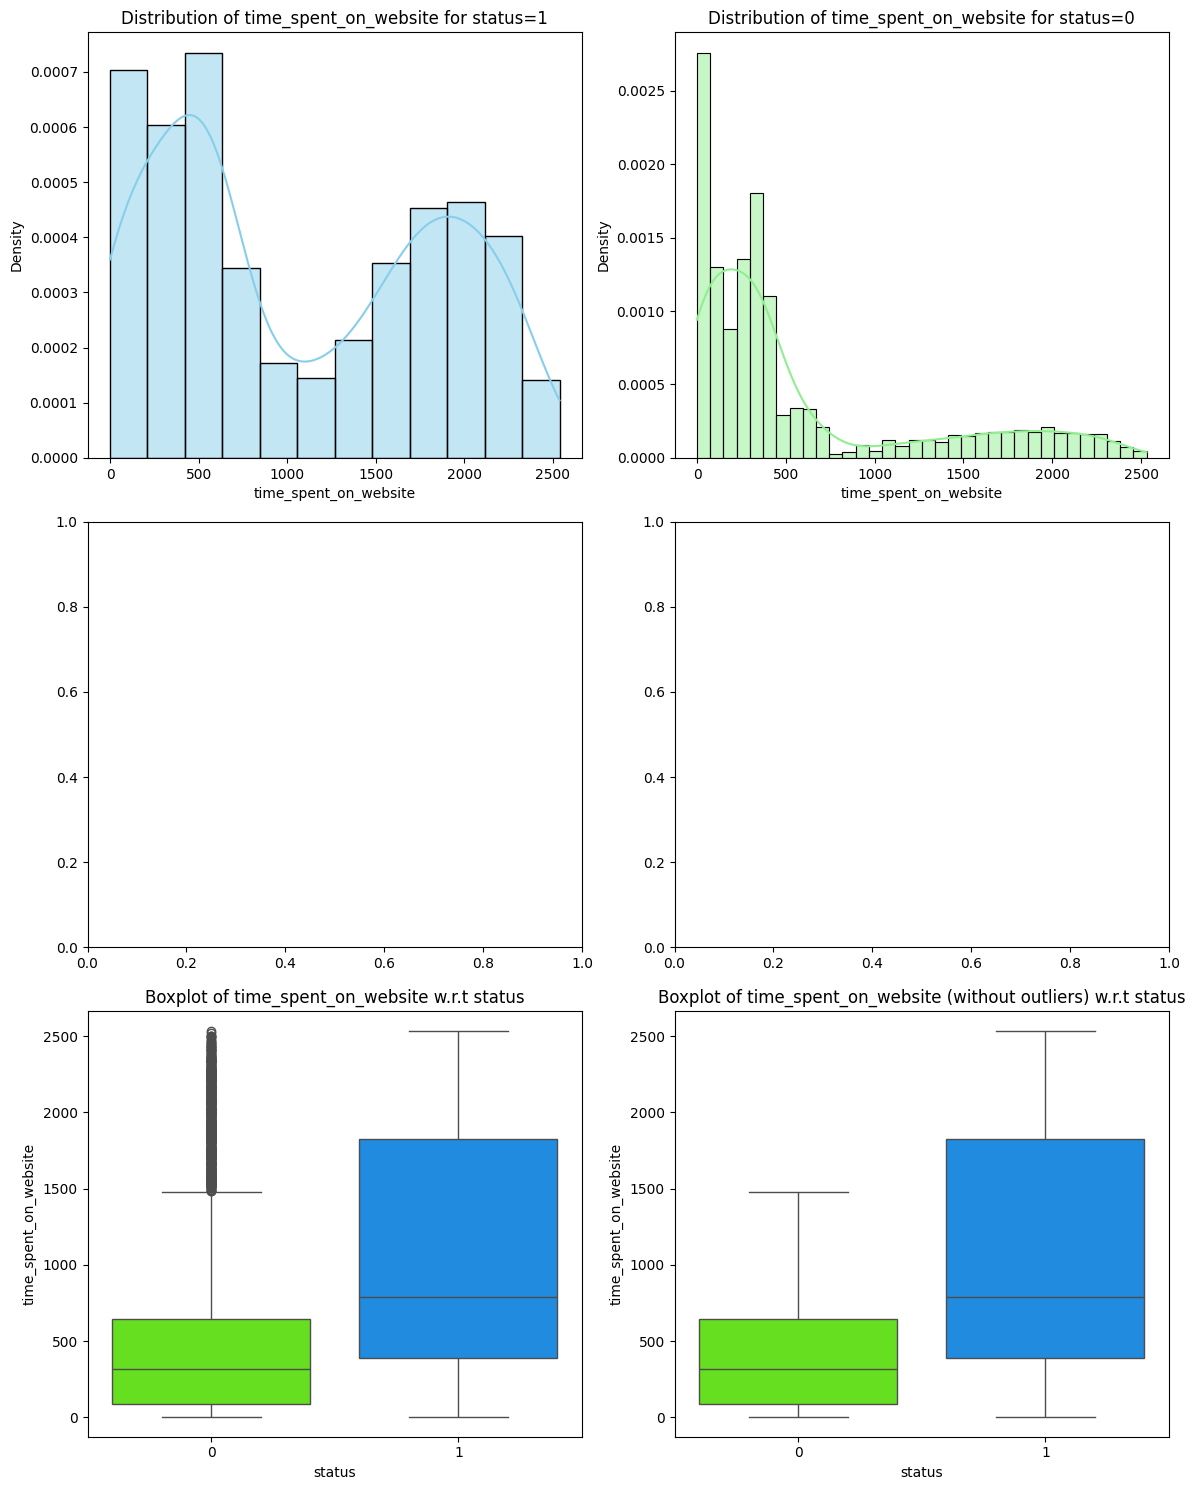

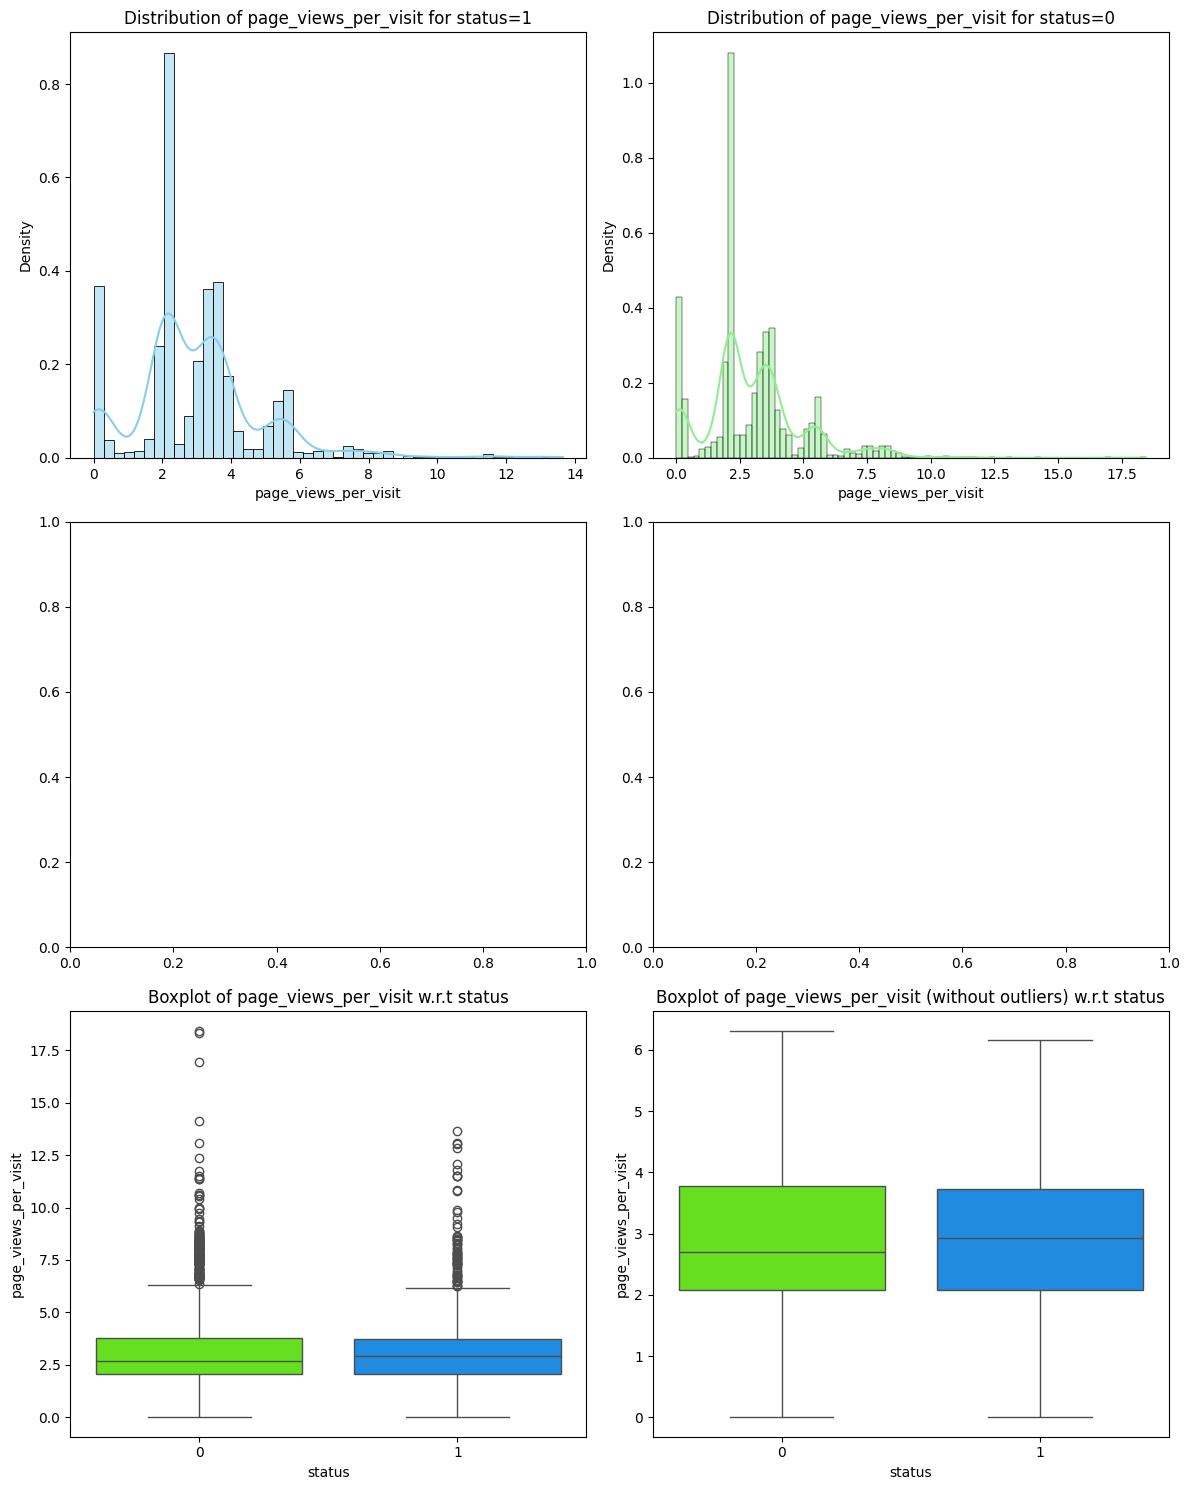


Bivariate analysis for current_occupation against status:
status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


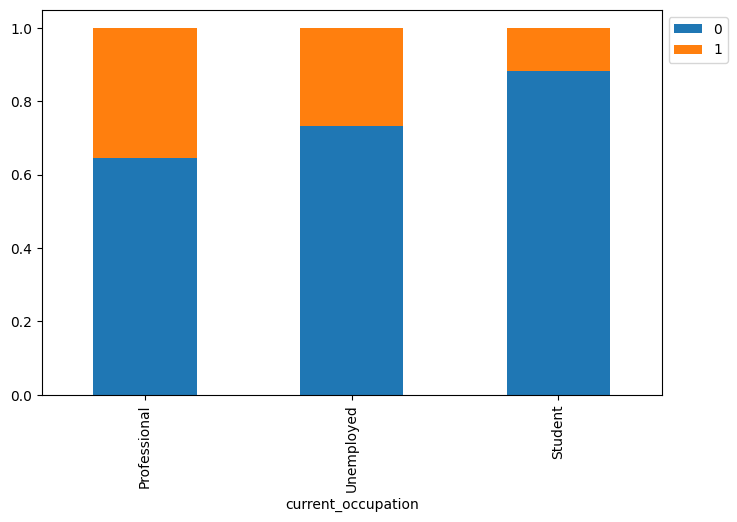


Bivariate analysis for first_interaction against status:
status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


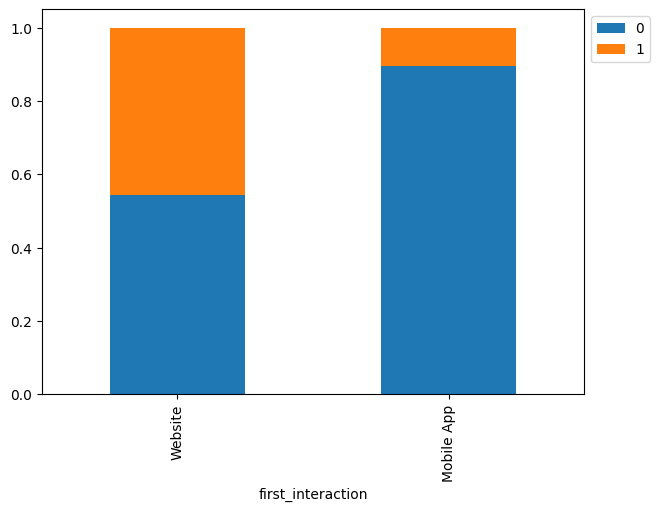


Bivariate analysis for profile_completed against status:
status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


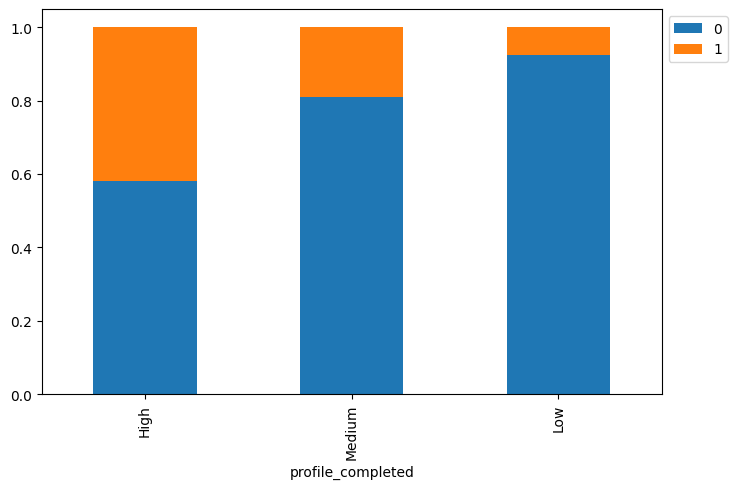


Bivariate analysis for last_activity against status:
status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


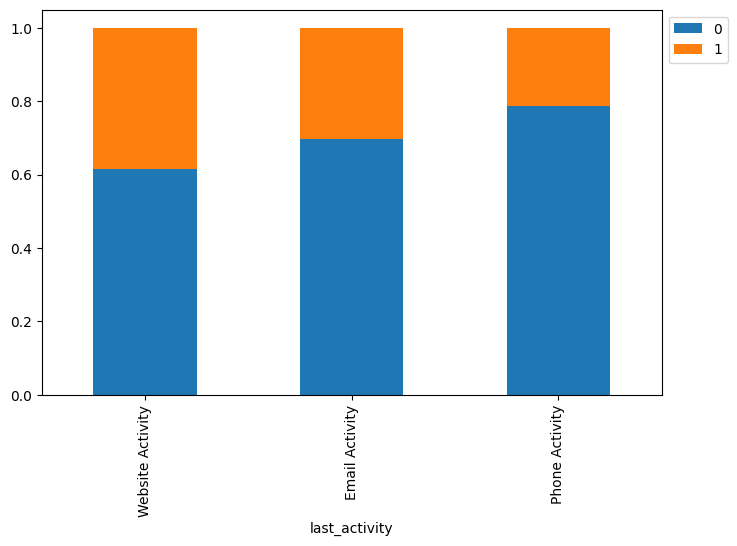


Bivariate analysis for print_media_type1 against status:
status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


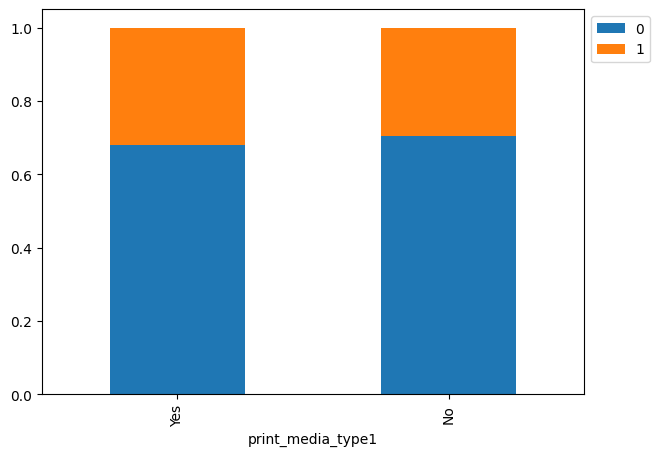


Bivariate analysis for print_media_type2 against status:
status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


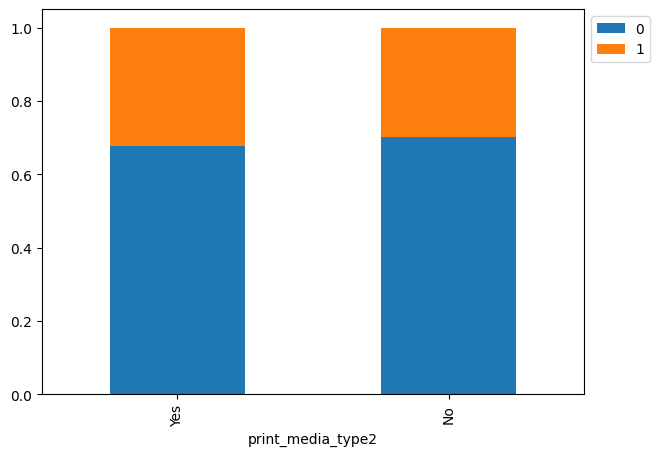


Bivariate analysis for digital_media against status:
status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


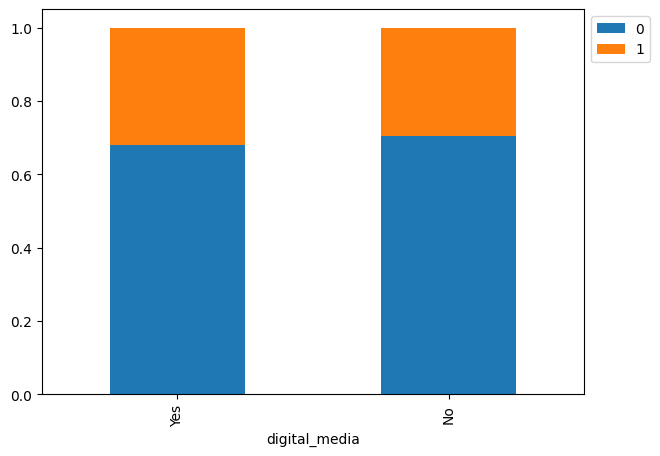


Bivariate analysis for educational_channels against status:
status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


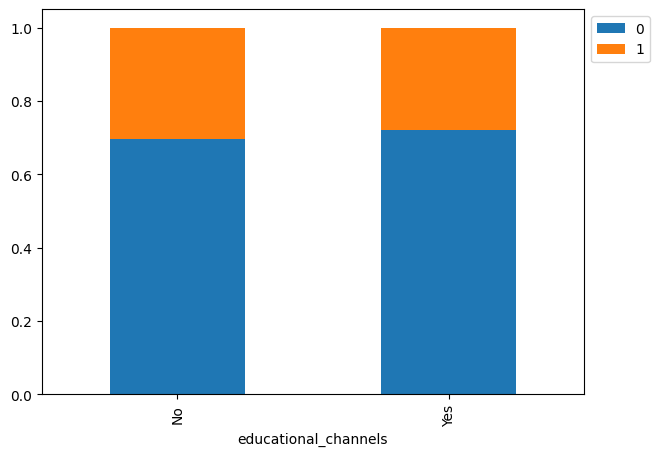


Bivariate analysis for referral against status:
status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


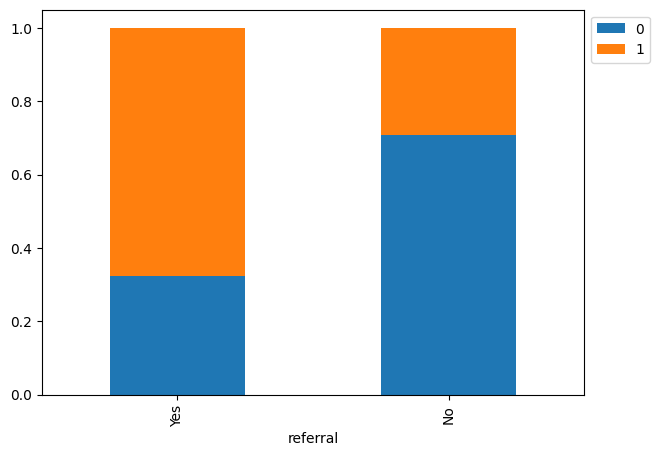

In [24]:
perform_bivariate_analysis(data, target="status")

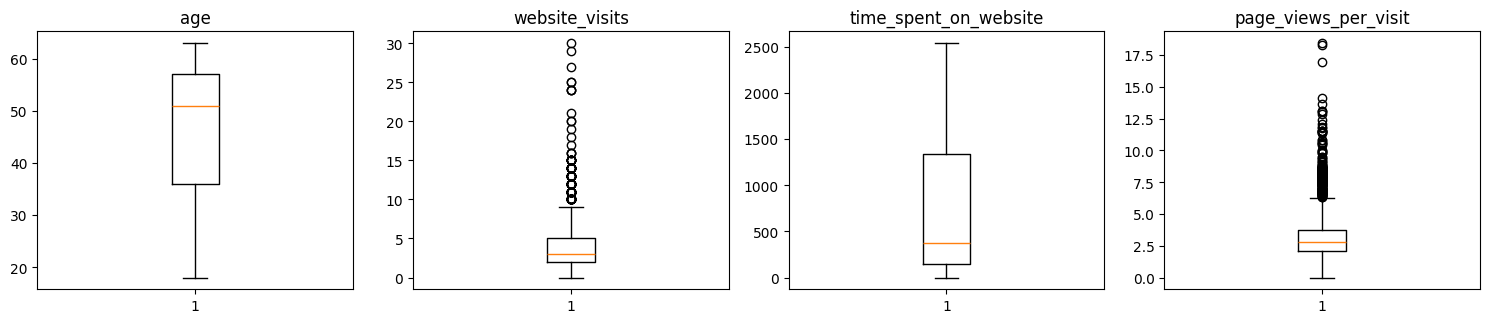

In [25]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)


In [26]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Encode categorical features
categorical_cols = data.select_dtypes(include=["object", "category"]).columns

# Perform one-hot encoding on categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 2. Split the data into train and test sets
# Separate the features and the target variable
X = data_encoded.drop("status", axis=1)  # Features
y = data_encoded["status"]  # Target

# Split the data - 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Statistics to print
stats = {
    "X_train_shape": X_train.shape,
    "X_test_shape": X_test.shape,
    "y_train_shape": y_train.shape,
    "y_test_shape": y_test.shape,
    "y_train_percentage": y_train.value_counts(normalize=True) * 100,
    "y_test_percentage": y_test.value_counts(normalize=True) * 100,
}

stats

{'X_train_shape': (3228, 16),
 'X_test_shape': (1384, 16),
 'y_train_shape': (3228,),
 'y_test_shape': (1384,),
 'y_train_percentage': status
 0   69.95043
 1   30.04957
 Name: proportion, dtype: float64,
 'y_test_percentage': status
 0   70.59249
 1   29.40751
 Name: proportion, dtype: float64}

In [27]:
X.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.86100,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2,83,0.32000,False,False,False,False,True,False,True,False,False,False,True,False
2,52,3,330,0.07400,False,False,True,False,True,False,True,False,False,True,False,False
3,53,4,464,2.05700,False,True,True,False,False,False,True,False,False,False,False,False
4,23,4,600,16.91400,True,False,True,False,False,False,False,False,False,False,False,False


## Building a Decision Tree model


In [28]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Model Performance evaluation and improvement


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Print classification report for precision, recall, f1-score
print(classification_report(y_test, y_pred_dt))

# Calculate ROC AUC score
roc_auc_dt = roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1])

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# ROC curve values
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       977
           1       0.67      0.66      0.67       407

    accuracy                           0.81      1384
   macro avg       0.77      0.76      0.76      1384
weighted avg       0.80      0.81      0.80      1384



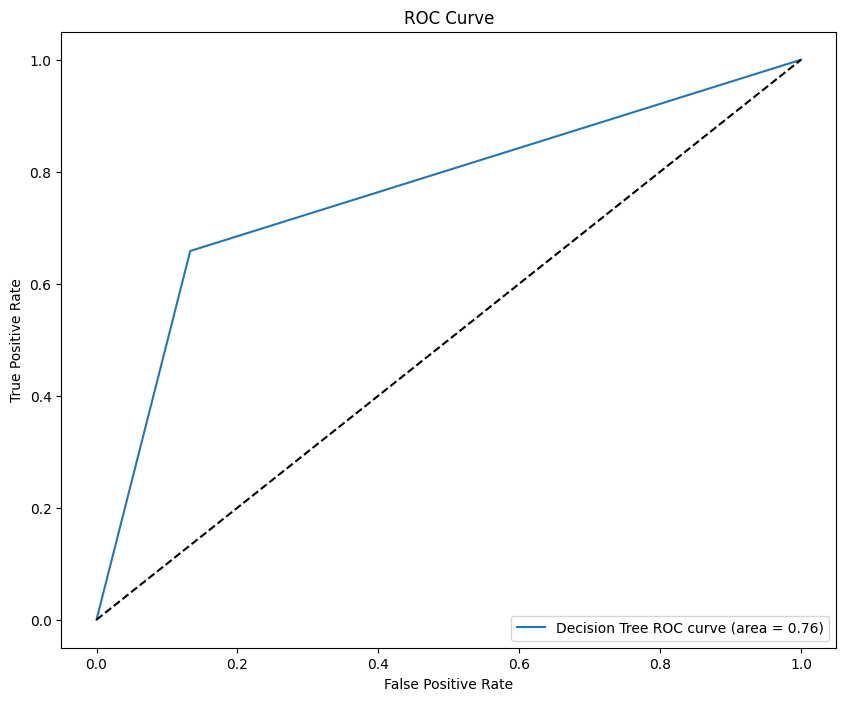

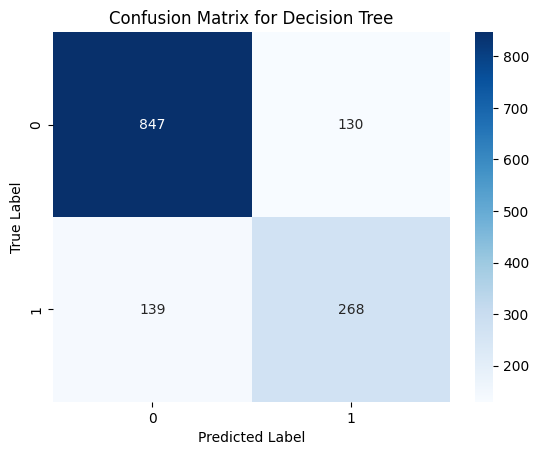

In [30]:
# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree ROC curve (area = {roc_auc_dt:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Dashed diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

## Building a Random Forest model


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model Performance evaluation and improvement


In [32]:
# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Print classification report for precision, recall, f1-score
print(classification_report(y_test, y_pred_rf))

# Calculate ROC AUC score
roc_auc_rf = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# ROC curve values
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       977
           1       0.80      0.68      0.73       407

    accuracy                           0.86      1384
   macro avg       0.84      0.80      0.82      1384
weighted avg       0.85      0.86      0.85      1384



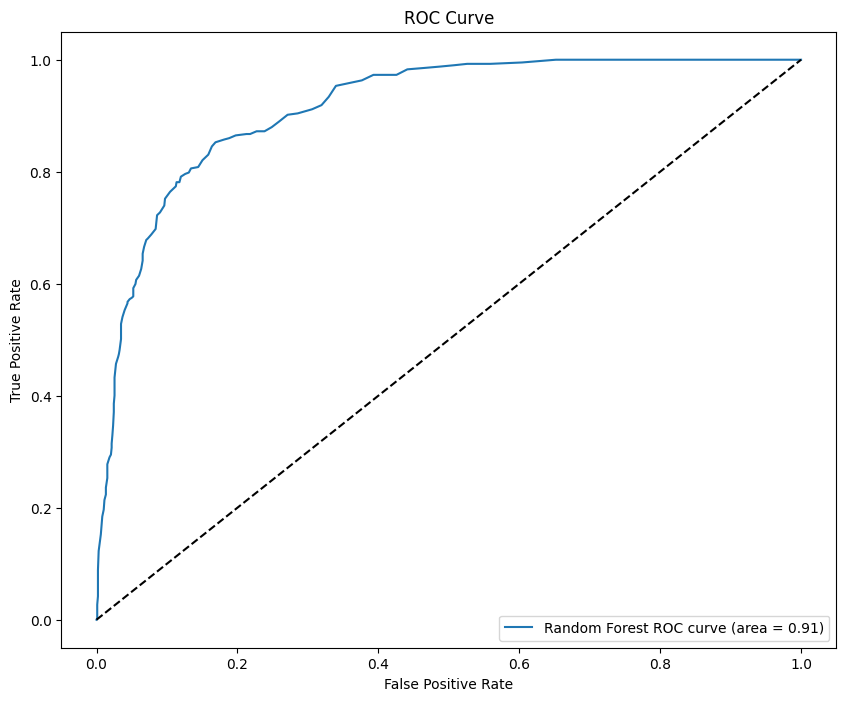

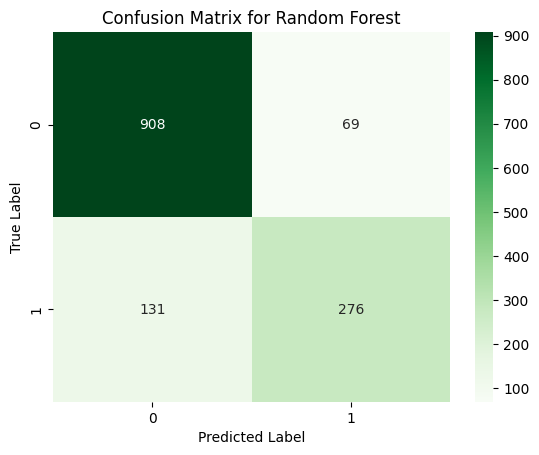

In [33]:
# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest ROC curve (area = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Dashed diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap=plt.cm.Greens)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [35]:
# Predict on the test data
y_pred_logreg = logreg.predict(X_test)

# Print classification report for precision, recall, f1-score
print(classification_report(y_test, y_pred_logreg))

# Calculate ROC AUC score
roc_auc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# ROC curve values
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       977
           1       0.68      0.61      0.64       407

    accuracy                           0.80      1384
   macro avg       0.76      0.74      0.75      1384
weighted avg       0.80      0.80      0.80      1384



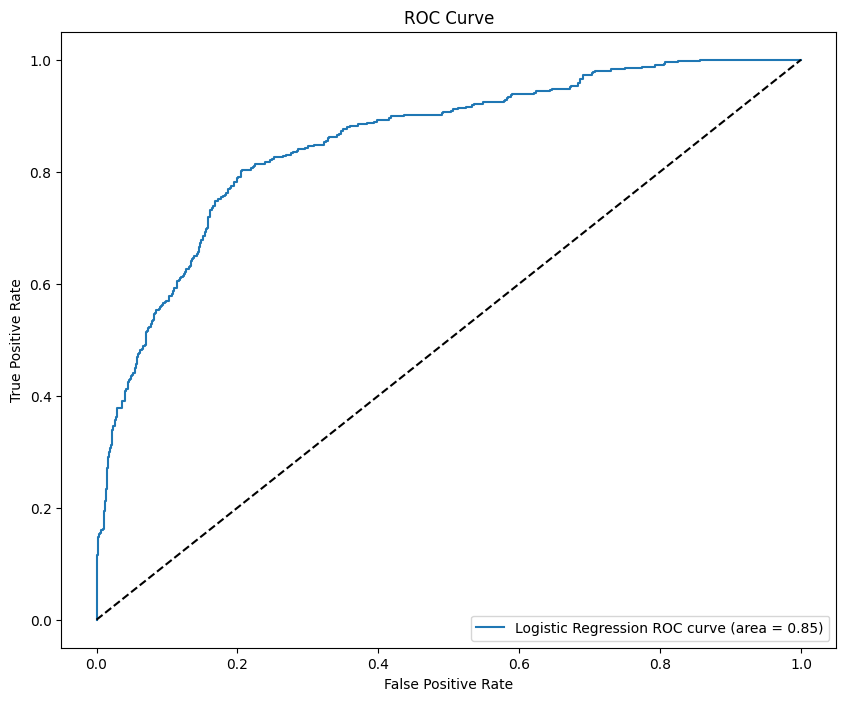

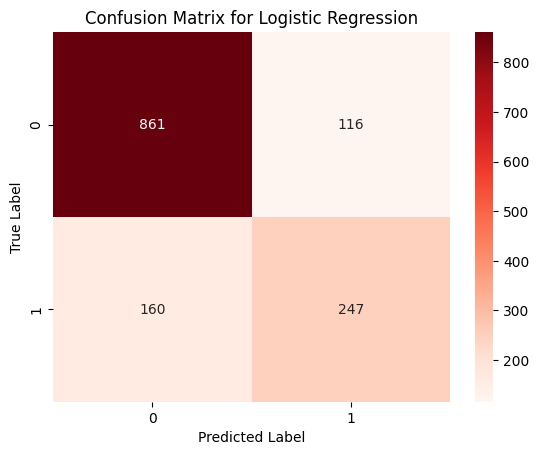

In [36]:
# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression ROC curve (area = {roc_auc_logreg:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Dashed diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap=plt.cm.Reds)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [37]:
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [38]:
# Predict on the test data
y_pred_xgb = xgb_classifier.predict(X_test)

# Print classification report for precision, recall, f1-score
print(classification_report(y_test, y_pred_xgb))

# Calculate ROC AUC score
roc_auc_xgb = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:, 1])

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# ROC curve values
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_classifier.predict_proba(X_test)[:, 1])

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       977
           1       0.74      0.67      0.71       407

    accuracy                           0.84      1384
   macro avg       0.81      0.79      0.80      1384
weighted avg       0.83      0.84      0.83      1384



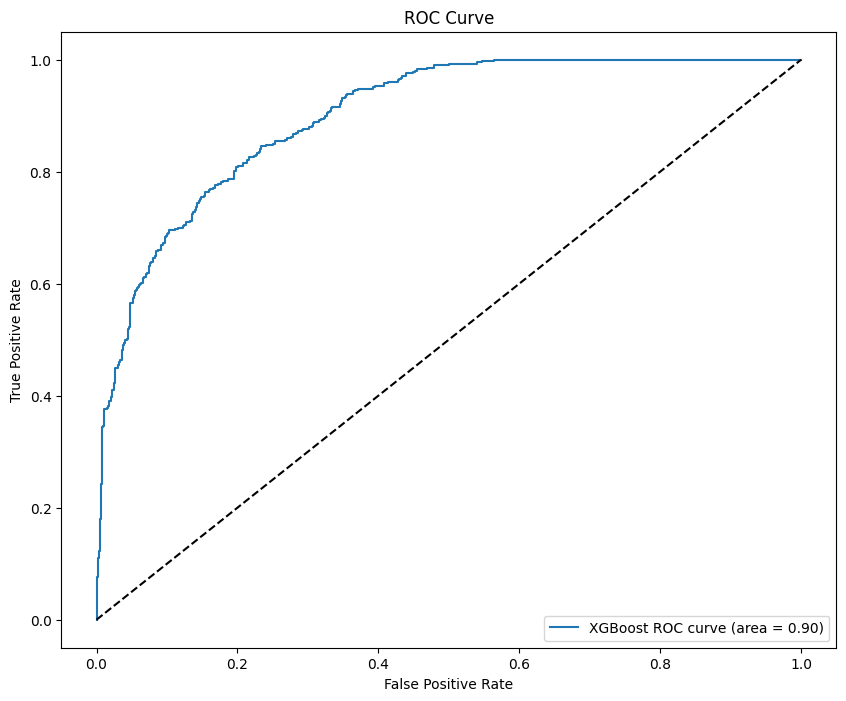

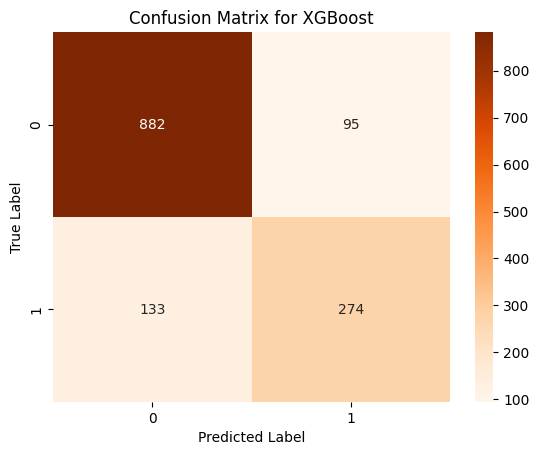

In [39]:
# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost ROC curve (area = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Dashed diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap=plt.cm.Oranges)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost")
plt.show()

In [40]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier with a linear kernel
svm_classifier = SVC(kernel="linear", probability=True, random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [41]:
# Predict on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Print classification report for precision, recall, f1-score
print(classification_report(y_test, y_pred_svm))

# Calculate ROC AUC score
roc_auc_svm = roc_auc_score(y_test, svm_classifier.predict_proba(X_test)[:, 1])

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# ROC curve values
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_classifier.predict_proba(X_test)[:, 1])

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       977
           1       0.66      0.70      0.68       407

    accuracy                           0.81      1384
   macro avg       0.77      0.78      0.77      1384
weighted avg       0.81      0.81      0.81      1384



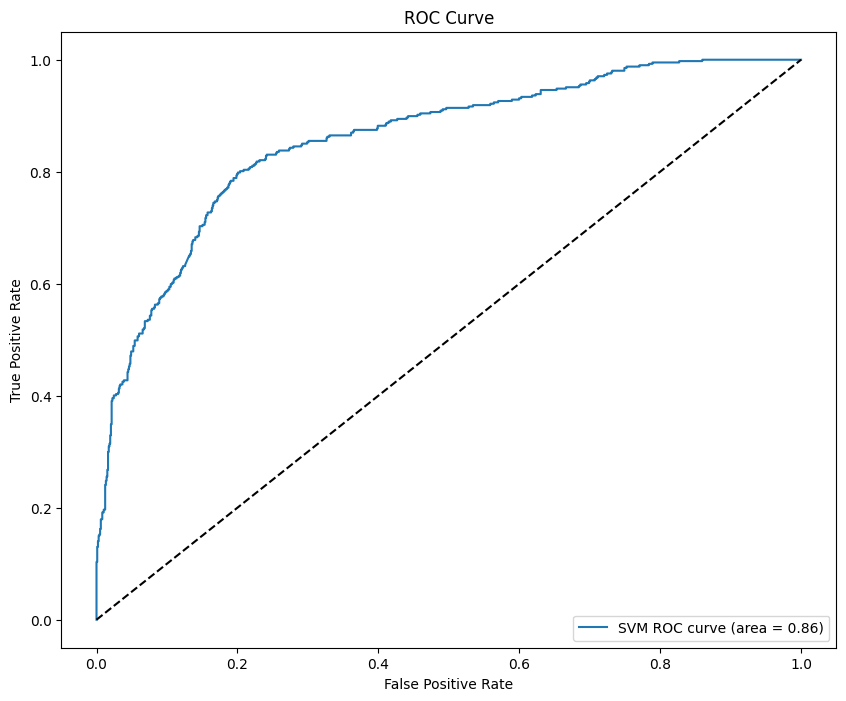

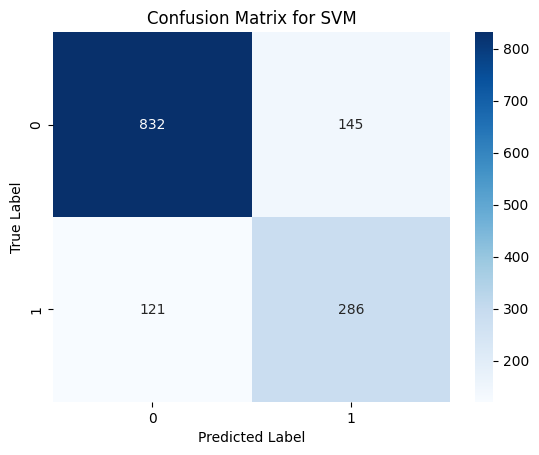

In [42]:
# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_svm, tpr_svm, label=f"SVM ROC curve (area = {roc_auc_svm:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Dashed diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM")
plt.show()

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

X_train_tf = X_train.astype("float32")
X_test_tf = X_test.astype("float32")

X_train_tf = np.nan_to_num(X_train_tf)
X_test_tf = np.nan_to_num(X_test_tf)

# Define the neural network structure
nn_classifier = Sequential(
    [
        Dense(128, activation="relu", input_shape=(X_train_tf.shape[1],)),
        Dense(64, activation="relu"),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid"),  # Output layer for binary classification
    ]
)

# Compile the model
nn_classifier.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

# Fit the model on the training data
history = nn_classifier.fit(X_train_tf, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

2024-03-31 10:26:34.455284: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 10:26:34.991763: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/100


2024-03-31 10:26:35.237870: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-31 10:26:35.253713: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6009 - loss: 8.0658 - val_accuracy: 0.7167 - val_loss: 0.7103
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.6953 - loss: 0.6644 - val_accuracy: 0.6889 - val_loss: 0.6652
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.6919 - loss: 0.7510 - val_accuracy: 0.7214 - val_loss: 0.5556
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.7020 - loss: 0.6281 - val_accuracy: 0.6176 - val_loss: 1.0619
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.6777 - loss: 0.8201 - val_accuracy: 0.7198 - val_loss: 0.5432
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.7252 - loss: 0.7033 - val_accuracy: 0.7260 - val_loss: 0.5424
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.6960 - loss: 0.8125 - val_accuracy: 0.7229 - val_loss: 0.5531
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.7263 - loss: 0.6125 - val_accuracy: 0.7307 -

In [44]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Predict on the test data
y_pred_nn_prob = nn_classifier.predict(X_test)
y_pred_nn = (y_pred_nn_prob > 0.5).astype("int32")

# Print classification report for precision, recall, f1-score
print(classification_report(y_test, y_pred_nn))

# Calculate ROC AUC score
roc_auc_nn = roc_auc_score(y_test, y_pred_nn_prob)

# Confusion Matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)

# ROC curve values
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_nn_prob)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       977
           1       0.66      0.70      0.68       407

    accuracy                           0.81      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.81      0.81      1384



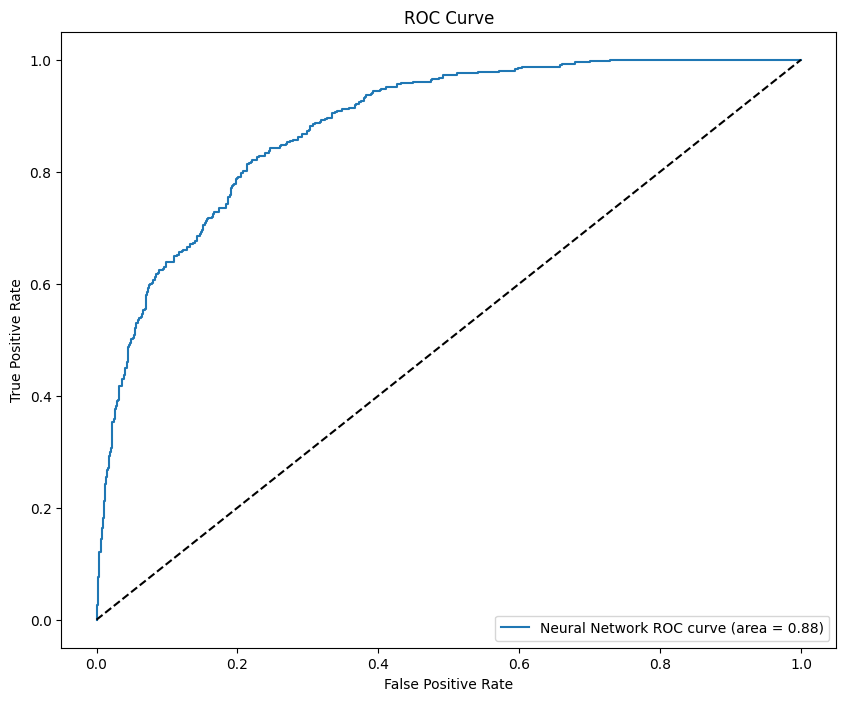

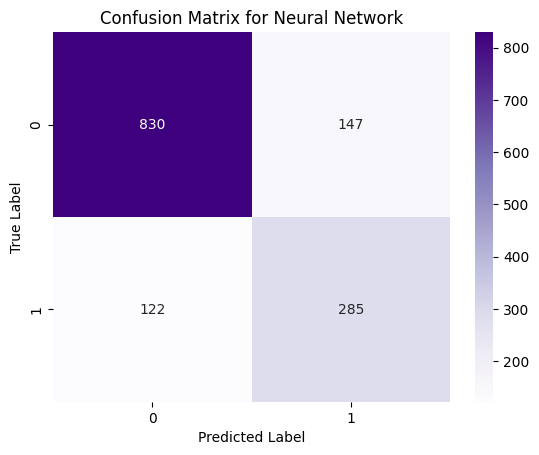

In [45]:
# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network ROC curve (area = {roc_auc_nn:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Dashed diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Neural Network")
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

# Create a pipeline that first scales the data then applies KNN
knn_classifier = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [47]:
# Predict on the test data
y_pred_knn = knn_classifier.predict(X_test)

# Print classification report for precision, recall, f1-score
print(classification_report(y_test, y_pred_knn))

# Calculate ROC AUC score
roc_auc_knn = roc_auc_score(y_test, knn_classifier.predict_proba(X_test)[:, 1])

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# ROC curve values
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_classifier.predict_proba(X_test)[:, 1])

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       977
           1       0.72      0.63      0.67       407

    accuracy                           0.82      1384
   macro avg       0.79      0.76      0.77      1384
weighted avg       0.81      0.82      0.81      1384



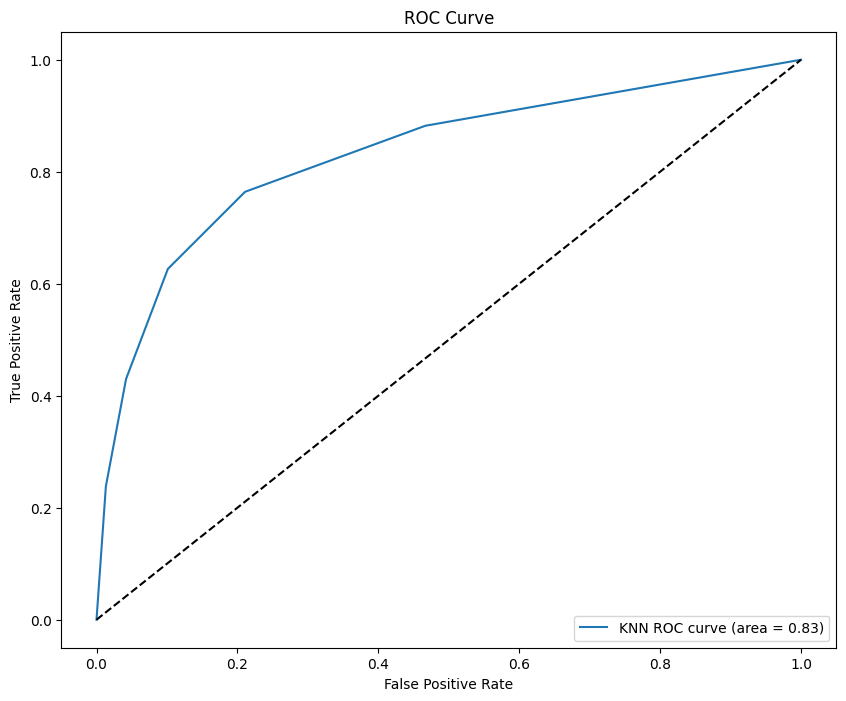

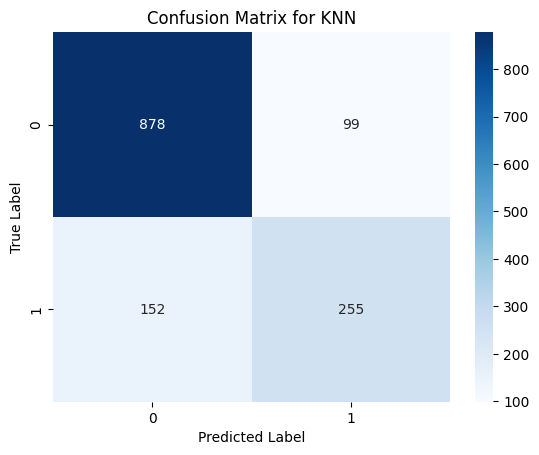

In [48]:
# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, label=f"KNN ROC curve (area = {roc_auc_knn:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Dashed diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN")
plt.show()

In [49]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Fit the model on the training data
gnb_classifier.fit(X_train, y_train)

GaussianNB()

In [50]:
# Predict on the test data
y_pred_gnb = gnb_classifier.predict(X_test)

# Print classification report for precision, recall, f1-score
print(classification_report(y_test, y_pred_gnb))

# Calculate ROC AUC score
roc_auc_gnb = roc_auc_score(y_test, gnb_classifier.predict_proba(X_test)[:, 1])

# Confusion Matrix
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

# ROC curve values
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, gnb_classifier.predict_proba(X_test)[:, 1])

              precision    recall  f1-score   support

           0       0.88      0.79      0.84       977
           1       0.60      0.74      0.66       407

    accuracy                           0.78      1384
   macro avg       0.74      0.77      0.75      1384
weighted avg       0.80      0.78      0.78      1384



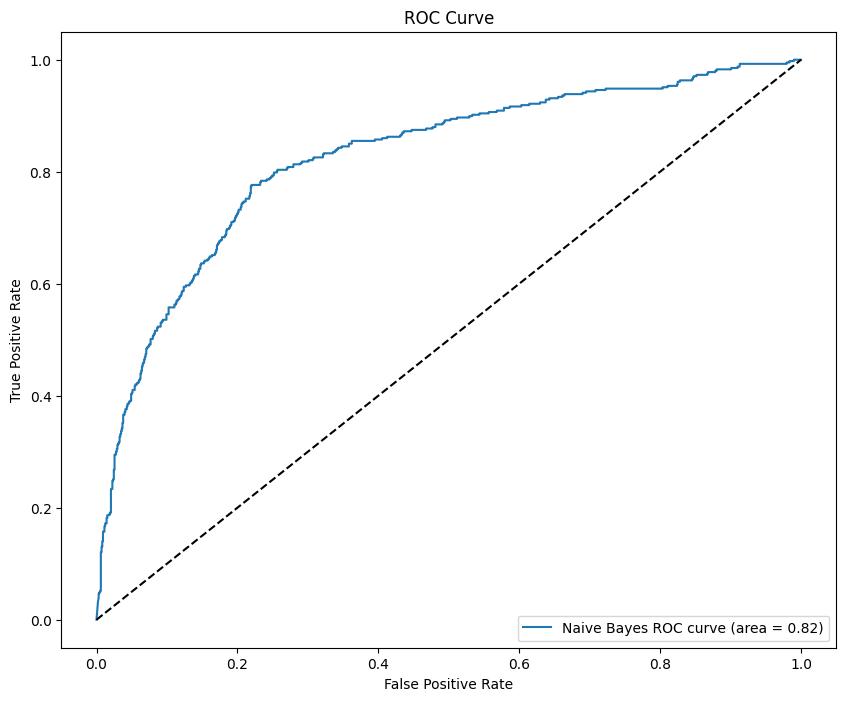

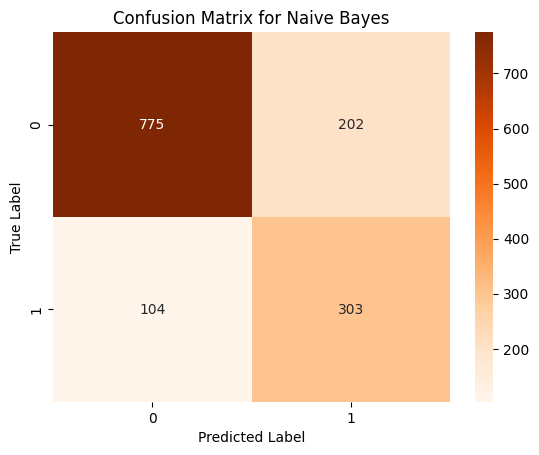

In [51]:
# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_gnb, tpr_gnb, label=f"Naive Bayes ROC curve (area = {roc_auc_gnb:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Dashed diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
sns.heatmap(conf_matrix_gnb, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [53]:
def evaluate_models(X, y, verbose=True):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "SVM": make_pipeline(StandardScaler(), SVC(probability=True)),
        "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier()),
        "Naive Bayes": GaussianNB(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    }

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Placeholder for results
    results = pd.DataFrame(index=models.keys(), columns=["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])

    # Iterate and evaluate models
    for name, model in models.items():
        if verbose:
            print(f"Training {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else np.zeros(len(y_pred))

        # Metrics calculation
        results = update_results(results, name, y_test, y_pred, y_proba)

        # Print classification report
        print_classification_report(y_test, y_pred, name)

        # Plot confusion matrix
        plot_confusion_matrix(y_test, y_pred, name)

    # Neural Network
    if verbose:
        print("Training Neural Network...")
    results = train_and_evaluate_nn(X_train, X_test, y_train, y_test, results, verbose)
    # Print classification report
    print_classification_report(y_test, y_pred, "Neural Network")

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, "Neural Network")

    # Plotting ROC Curves
    plot_roc_curves(results, y_test, X_test, models)

    if verbose:
        print("Evaluation completed.")
    return results


def update_results(results, name, y_test, y_pred, y_proba):
    results.loc[name, "Accuracy"] = accuracy_score(y_test, y_pred)
    results.loc[name, "Precision"] = precision_score(y_test, y_pred, zero_division=0)
    results.loc[name, "Recall"] = recall_score(y_test, y_pred)
    results.loc[name, "F1 Score"] = f1_score(y_test, y_pred)
    results.loc[name, "ROC AUC"] = roc_auc_score(y_test, y_proba)
    return results


def train_and_evaluate_nn(X_train, X_test, y_train, y_test, results, verbose):
    # Convert data to float32 for Neural Network
    X_train_tf = X_train.astype("float32")
    X_test_tf = X_test.astype("float32")

    # Replace NaN and infinite values
    X_train_tf = np.nan_to_num(X_train_tf)
    X_test_tf = np.nan_to_num(X_test_tf)

    # Define the Neural Network structure
    nn_classifier = Sequential(
        [
            Dense(128, activation="relu", input_shape=(X_train_tf.shape[1],)),
            Dense(64, activation="relu"),
            Dense(32, activation="relu"),
            Dense(1, activation="sigmoid"),
        ]
    )

    # Compile the model
    nn_classifier.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

    # Fit the model on the training data
    nn_classifier.fit(
        X_train_tf, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=0 if not verbose else 1
    )

    # Predict and evaluate
    y_pred_nn_prob = nn_classifier.predict(X_test_tf).ravel()
    y_pred_nn = (y_pred_nn_prob > 0.5).astype(int)

    return update_results(results, "Neural Network", y_test, y_pred_nn, y_pred_nn_prob)


def plot_roc_curves(results, y_test, X_test, models):
    plt.figure(figsize=(10, 8))
    for name in results.index:
        if name in models:  # Sklearn and XGB models
            model = models[name]
            y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else np.zeros(len(y_test))
        else:  # Handle Neural Network separately
            continue  # NN ROC curve plotted in separate process
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {results.loc[name, 'ROC AUC']:.2f})")

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend()
    plt.show()


def print_classification_report(y_true, y_pred, model_name):
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred))


def plot_confusion_matrix(y_true, y_pred, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

In [54]:
# 1. Encode categorical features
categorical_cols = data.select_dtypes(include=["object", "category"]).columns

# Perform one-hot encoding on categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 2. Split the data into train and test sets
# Separate the features and the target variable
X = data_encoded.drop("status", axis=1)  # Features
y = data_encoded["status"]  # Target

Training Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       977
           1       0.68      0.61      0.65       407

    accuracy                           0.80      1384
   macro avg       0.76      0.75      0.75      1384
weighted avg       0.80      0.80      0.80      1384



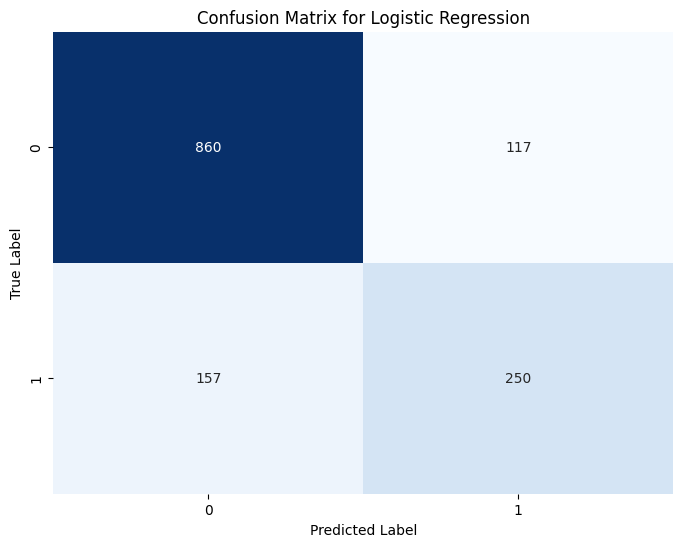

Training Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       977
           1       0.79      0.69      0.73       407

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



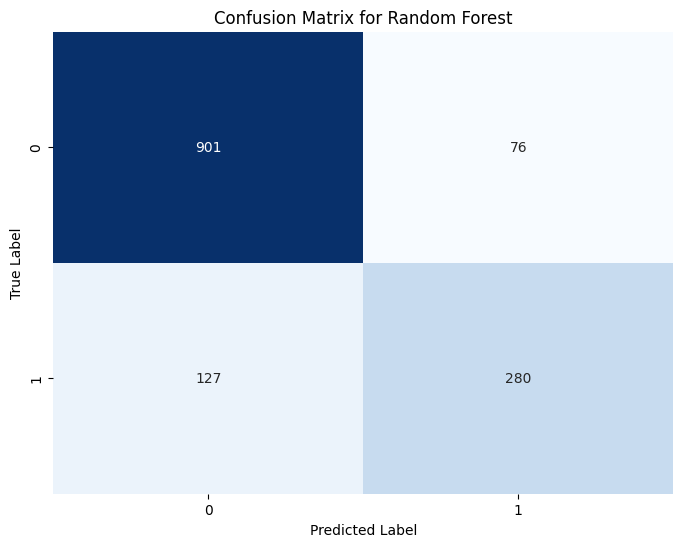

Training Decision Tree...
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       977
           1       0.67      0.66      0.66       407

    accuracy                           0.80      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.80      0.80      0.80      1384



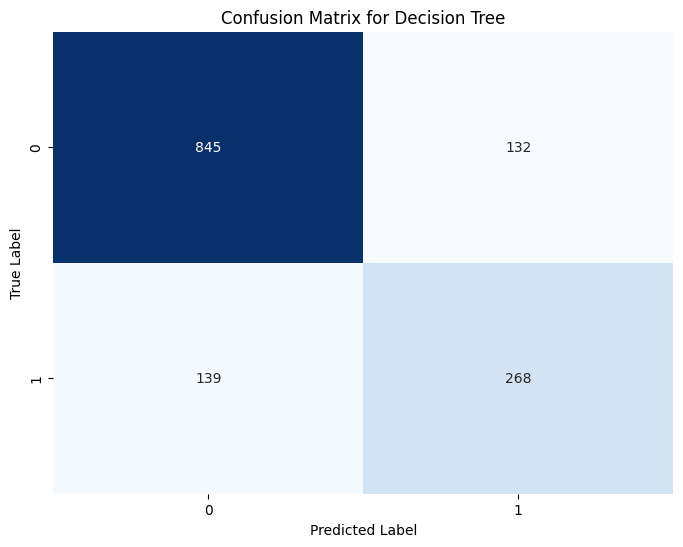

Training SVM...
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       977
           1       0.76      0.66      0.70       407

    accuracy                           0.84      1384
   macro avg       0.81      0.79      0.80      1384
weighted avg       0.83      0.84      0.83      1384



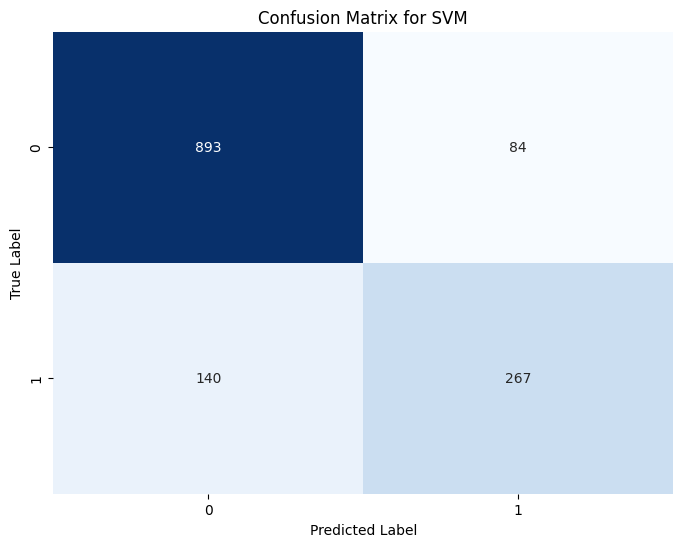

Training KNN...
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       977
           1       0.72      0.63      0.67       407

    accuracy                           0.82      1384
   macro avg       0.79      0.76      0.77      1384
weighted avg       0.81      0.82      0.81      1384



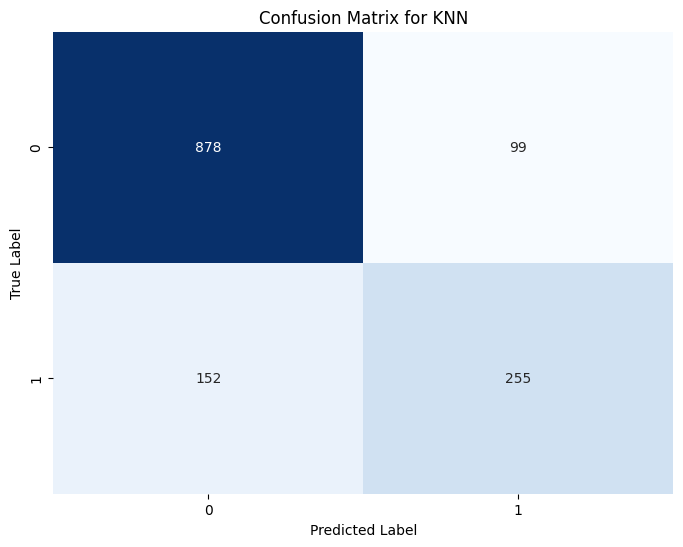

Training Naive Bayes...
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.88      0.79      0.84       977
           1       0.60      0.74      0.66       407

    accuracy                           0.78      1384
   macro avg       0.74      0.77      0.75      1384
weighted avg       0.80      0.78      0.78      1384



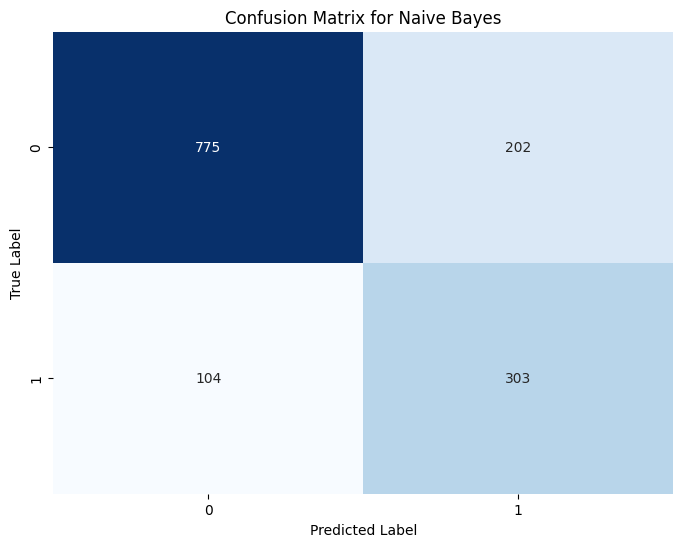

Training XGBoost...
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       977
           1       0.74      0.67      0.71       407

    accuracy                           0.84      1384
   macro avg       0.81      0.79      0.80      1384
weighted avg       0.83      0.84      0.83      1384



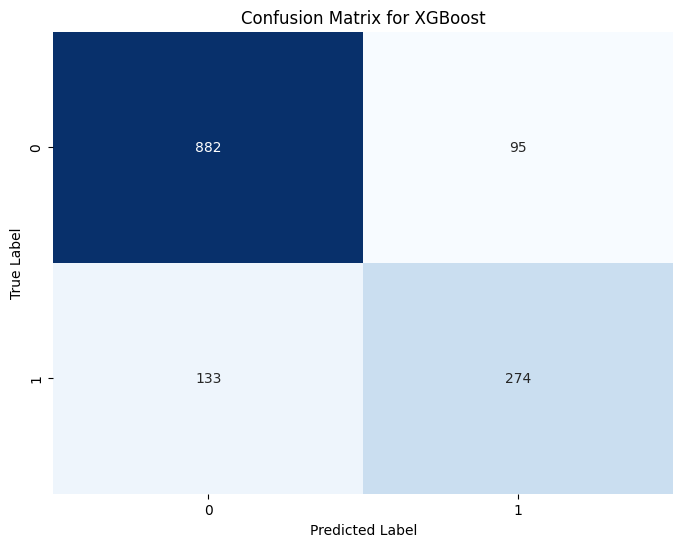

Training Neural Network...
Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6330 - loss: 3.2139 - val_accuracy: 0.6811 - val_loss: 0.8831
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.6619 - loss: 1.1325 - val_accuracy: 0.7167 - val_loss: 2.2808
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.6725 - loss: 1.5465 - val_accuracy: 0.7167 - val_loss: 1.1279
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.6731 - loss: 1.0939 - val_accuracy: 0.6734 - val_loss: 1.1916
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.7312 - loss: 0.5788 - val_accuracy: 0.7167 - val_loss: 0.8773
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.7202 - loss: 0.6762 - val_accuracy: 0.4876 - val_loss: 5.5551
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.6735 - loss: 1.7494 - val_accuracy: 0.7136 - val_loss: 0.5547
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.7207 - loss: 

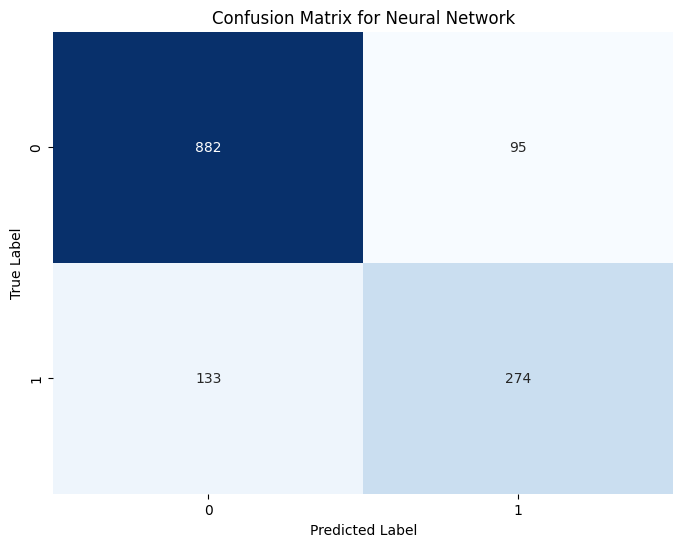

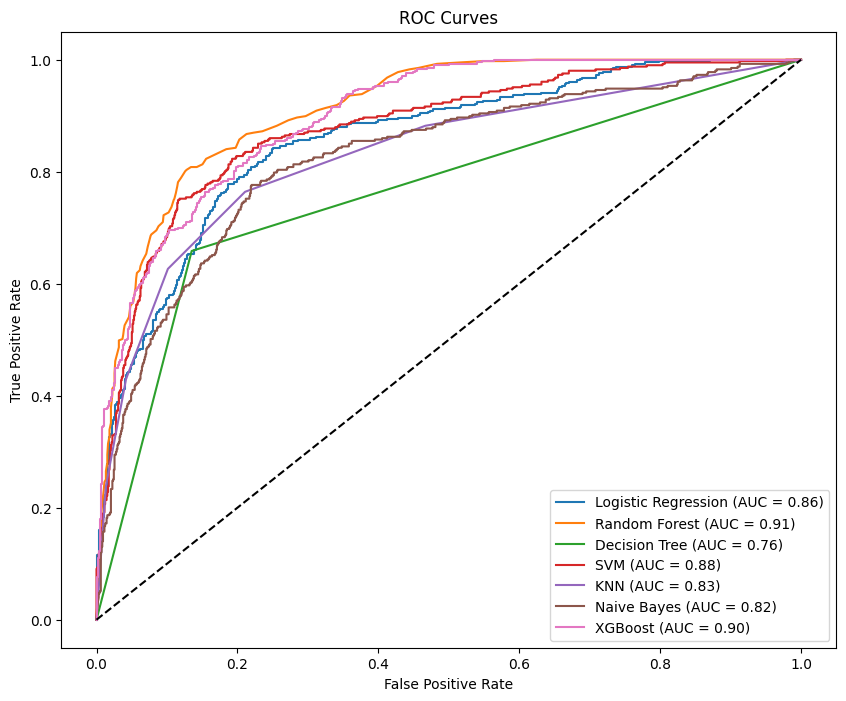

Evaluation completed.
                    Accuracy Precision  Recall F1 Score ROC AUC
Logistic Regression  0.80202   0.68120 0.61425  0.64599 0.85745
Random Forest        0.85332   0.78652 0.68796  0.73394 0.91157
Decision Tree        0.80419   0.67000 0.65848  0.66419 0.76168
SVM                  0.83815   0.76068 0.65602  0.70449 0.87744
KNN                  0.81864   0.72034 0.62654  0.67017 0.83111
Naive Bayes          0.77890   0.60000 0.74447  0.66447 0.82428
XGBoost              0.83526   0.74255 0.67322  0.70619 0.89983
Neural Network       0.68353   0.47377 0.68796  0.56112 0.75472


In [55]:
results = evaluate_models(X, y, verbose=True)
print(results)

## Actionable Insights and Recommendations


Based on the evaluation metrics and the ROC curves provided for the various models tested, here are some observations, insights, and recommendations:

### Observations:

- **Random Forest** and **XGBoost** have the highest ROC AUC scores, indicating that they perform better in distinguishing between the two classes (converted leads and non-converted leads) compared to the other models.
- **Random Forest** also has the highest accuracy, suggesting that it makes the correct prediction a higher percentage of the time over the other models.
- **SVM** and **Logistic Regression** follow closely in terms of ROC AUC, with decent accuracy scores as well. They could be good alternatives, considering their interpretability.
- **Neural Network** has significantly lower performance metrics across the board, which might indicate that the network architecture is not complex enough, the model is not well-tuned, or that the model is underfitting.
- **Naive Bayes** exhibits a high recall but lower precision, indicating a tendency to classify non-converting leads as converting.
- **KNN** and **Decision Tree** show moderate performance.

### Insights:

- Models like **Random Forest** and **XGBoost** tend to perform well on tabular data and have advantages in handling non-linear relationships and interactions between features.
- **Random Forest**'s success might be due to its ensemble nature, where it aggregates the decisions from multiple decision trees to make a final decision, which often leads to improved accuracy and robustness.
- **XGBoost** employs gradient boosting, which builds trees sequentially, with each new tree attempting to correct the errors made by the previous ones, hence the strong performance.
- **SVM**'s solid performance indicates that the decision boundary between the two classes might be well-defined and could be linear or near-linear since a linear kernel was used.
- The **Neural Network** may require further tuning, more data, or a more complex architecture to perform well. Neural networks typically excel when they have large amounts of data to learn from.

### Recommendations:

1. **Model Selection**: Given their strong performance and general utility in classification tasks, **Random Forest** and **XGBoost** are recommended for further tuning and consideration. They are robust and less likely to overfit compared to simpler models.

2. **Model Interpretability**: If the project requires model interpretability (i.e., understanding why a lead is predicted to convert or not), **Logistic Regression** or **SVM** might be preferred due to their simplicity and the ability to explain predictions using feature weights.

3. **Feature Importance**: Analyzing feature importance from models like Random Forest and XGBoost can provide insights into which features are most influential in predicting lead conversion, which can inform business decisions and strategy.

4. **Neural Network Improvements**: If pursuing Neural Networks, consider investing time into hyperparameter tuning, feature engineering, and perhaps increasing the model's complexity with more layers or neurons. Alternatively, gathering more data could also be beneficial.

5. **Further Analysis**: Perform a deeper analysis of the false positives and false negatives from the models, especially from the best performers, to understand where they are making mistakes and if there's a pattern.

6. **Business Impact**: Align model choice with business objectives. For instance, if the cost of missing a potential lead conversion is high, a model with higher recall might be preferred.

7. **Ensemble Approaches**: Consider ensemble approaches that combine the predictions of multiple models to improve performance.

In conclusion, I recommend starting with **Random Forest** and **XGBoost** due to their superior performance metrics. They offer a good balance between accuracy and the ability to handle complex patterns in the data. If interpretability is key, then Logistic Regression could be a suitable choice. For the Neural Network, invest in more detailed tuning and exploration before ruling it out.
